# PROYECTO FINAL DS CODERHOUSE


Alumno JOAQUIN GOROSTIZA
Docente ARTURO TAPIAS
Tutor ESTEFANIA SUSANJ



#TEMATICA: MERCADO INMOBILIARIO
# OBJETIVO
Predecir el precio de venta aproximado de nuevas viviendas que ingresen al mercado, de forma de determinar un valor justo de venta para informar a los clientes de una inmobiliaria. Muchas veces los clientes suelen inflar el precio que pretenden por sus viviendas debido al valor afectivo, por lo tanto esta herramienta ayudará a controlar la especulación inmobiliaria.

#CONTEXTO COMERCIAL
Una reconocida cadena inmobiliaria de España nos solicita una herramienta de predicción para tasar inmuebles para la venta, de modo de poder generar una rápida proyección en etapas iniciales para generar un informe y presentar a los clientes (dueños de las viviendas), prescindiendo de tasaciones realizadas por los profesionales idóneos. Esta herramienta podrá generar las proyecciones correspondientes y compararlas con los precios pretendidos por los dueños, y en casos donde los valores sean similares, se podría directamente informar al cliente que el precio pretendido es acorde al mercado inmobiliario. Por otro lado, se podrían agrupar las tasaciones en donde los precios sean muy dispares y solicitar a los profesionales correspondientes que realicen una tasación in-situ de la vivienda a modo de corroborar si se justifica el valor requerido por los clientes.(detectar posible falla en el algoritmo por falta de consideración de alguna variable)

#CONTEXTO ANALÍTICO
¿Es posible generar una predicción de regresión para conocer el valor de venta certero de los inmuebles en venta?¿Alcanza con las variables disponibles o se deberían buscar conocer nuevas variables?¿Los dueños de las viviendas pretenden obtener un valor monetario similar a lo que ofrece el mercado?



#ADQUISICiÓN DE DATOS
La empresa inmobiliaria nos brinda una base de datos que ha sido generada en base a registros de compraventas proporcionada por la camara inmobiliaria de la ciudad de Madrid

In [ ]:
#Cargo librerías generales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#ADQUISICIÓN DE DATOS
La empresa inmobiliaria nos brinda una base de datos que ha sido generada en base a registros de compraventas proporcionada por la camara inmobiliaria de la ciudad de Madrid

In [ ]:
#cargado desde Github
Inmuebles_Madrid=pd.read_csv("https://raw.githubusercontent.com/Jgorostiza/CoderHouse_DS/main/Mercado_Inmobiliario_Madrid.csv")



Inmuebles_Madrid.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,1,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0


En este dataset **contamos con la variable precio de venta**, que es la que intentaré predecir para futuros inmuebles.




*Algunas transformaciones para ordenar el Dataset*

In [ ]:
#Reemplazo NaN por 0
Inmuebles_Madrid['built_year'] = Inmuebles_Madrid.loc[:,'built_year'].fillna(value=0,downcast='int')
Inmuebles_Madrid['n_bathrooms']= Inmuebles_Madrid.loc[:,'n_bathrooms'].fillna(value=0,downcast='int')

In [ ]:
#asumo que cuando las variables solo presentan valores True o null, el valor null representa a False:
Inmuebles_Madrid[['has_garden','has_pool','has_terrace','has_balcony','has_green_zones','has_lift','has_storage_room','has_fitted_wardrobes']]=Inmuebles_Madrid[['has_garden','has_pool','has_terrace','has_balcony','has_green_zones','has_lift','has_storage_room','has_fitted_wardrobes']].fillna(0)
Inmuebles_Madrid[['has_garden','has_pool','has_terrace','has_balcony','has_green_zones','has_lift','has_storage_room','has_fitted_wardrobes']]=Inmuebles_Madrid[['has_garden','has_pool','has_terrace','has_balcony','has_green_zones','has_lift','has_storage_room','has_fitted_wardrobes']].replace(True,1)
Inmuebles_Madrid[['has_garden','has_pool','has_terrace','has_balcony','has_green_zones','has_lift','has_storage_room','has_fitted_wardrobes']]=Inmuebles_Madrid[['has_garden','has_pool','has_terrace','has_balcony','has_green_zones','has_lift','has_storage_room','has_fitted_wardrobes']].astype('int64')

In [ ]:
#Variable floor: Refiere a la altura de la unidad; reemplazo algunos específicos por nulos o 0 para poder codificar variable
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Bajo',0)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Sótano interior',-1)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Sótano',-1)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Semi-sótano',-1)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Sótano exterior',-1)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Semi-sótano exterior',-1)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Semi-sótano interior',-1)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Entreplanta exterior',1.5)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Entreplanta interior',1.5)
Inmuebles_Madrid[['floor']]=Inmuebles_Madrid[['floor']].replace('Entreplanta',1.5)



In [ ]:
#filtro atípicos en año de construcción
Inmuebles_Madrid['built_year'].fillna(0)
filteraño = (Inmuebles_Madrid['built_year'] > 1950) & (Inmuebles_Madrid['built_year'] < 2024)
Inmuebles_Madrid_2=Inmuebles_Madrid[filteraño]
Inmuebles_Madrid_2.reset_index(drop=True,inplace=True)

In [ ]:
# Agrupo Orientación
Inmuebles_Madrid_2['Orientación']=np.nan
sun1= (Inmuebles_Madrid_2.is_orientation_north==True)
sun2= (Inmuebles_Madrid_2.is_orientation_west==True)
sun3= (Inmuebles_Madrid_2.is_orientation_south==True)
sun4= (Inmuebles_Madrid_2.is_orientation_east==True)
Esun1='Norte'
Esun2='Oeste'
Esun3='Sur'
Esun4='Este'
Inmuebles_Madrid_2.loc[sun1,'Orientación'] = Esun1
Inmuebles_Madrid_2.loc[sun2,'Orientación'] = Esun2
Inmuebles_Madrid_2.loc[sun3,'Orientación'] = Esun3
Inmuebles_Madrid_2.loc[sun4,'Orientación'] = Esun4
Inmuebles_Madrid_2.loc[:,'Orientación'] = Inmuebles_Madrid_2.Orientación.fillna(value='SD', inplace=False)

In [ ]:
# Agrupo Metraje
Inmuebles_Madrid_2['Mt2_Agrupado']=np.nan
FMts1=(Inmuebles_Madrid_2.sq_mt_built>0) & (Inmuebles_Madrid_2.sq_mt_built<100)
FMts2=(Inmuebles_Madrid_2.sq_mt_built>=100) & (Inmuebles_Madrid_2.sq_mt_built<200)
FMts3=(Inmuebles_Madrid_2.sq_mt_built>=200) & (Inmuebles_Madrid_2.sq_mt_built<300)
FMts4=(Inmuebles_Madrid_2.sq_mt_built>=300) & (Inmuebles_Madrid_2.sq_mt_built<400)
FMts5=(Inmuebles_Madrid_2.sq_mt_built>=400)
E1='<100'
E2='100-200'
E3='200-300'
E4='300-400'
E5='>400'
Inmuebles_Madrid_2.loc[FMts1,'Mt2_Agrupado'] = E1
Inmuebles_Madrid_2.loc[FMts2,'Mt2_Agrupado'] = E2
Inmuebles_Madrid_2.loc[FMts3,'Mt2_Agrupado'] = E3
Inmuebles_Madrid_2.loc[FMts4,'Mt2_Agrupado'] = E4
Inmuebles_Madrid_2.loc[FMts5,'Mt2_Agrupado'] = E5

In [ ]:
# Agrupo cuartos
Inmuebles_Madrid_2['Dormitorios']=np.nan
Inmuebles_Madrid_2['n_rooms']=Inmuebles_Madrid_2['n_rooms'].astype('int64')
room1= (Inmuebles_Madrid_2.n_rooms==0)
room2= (Inmuebles_Madrid_2.n_rooms==1)
room3= (Inmuebles_Madrid_2.n_rooms==2)
room4= (Inmuebles_Madrid_2.n_rooms==3)
room5= (Inmuebles_Madrid_2.n_rooms==4)
room6= (Inmuebles_Madrid_2.n_rooms==5)
room7= (Inmuebles_Madrid_2.n_rooms==6)
room8= (Inmuebles_Madrid_2.n_rooms > 7)
ER1='Mono'
ER2='1'
ER3='2'
ER4='3'
ER5='4'
ER6='5'
ER7='6'
ER8='>6'
Inmuebles_Madrid_2.loc[room1,'Dormitorios'] = ER1
Inmuebles_Madrid_2.loc[room2,'Dormitorios'] = ER2
Inmuebles_Madrid_2.loc[room3,'Dormitorios'] = ER3
Inmuebles_Madrid_2.loc[room4,'Dormitorios'] = ER4
Inmuebles_Madrid_2.loc[room5,'Dormitorios'] = ER5
Inmuebles_Madrid_2.loc[room6,'Dormitorios'] = ER6
Inmuebles_Madrid_2.loc[room7,'Dormitorios'] = ER7
Inmuebles_Madrid_2.loc[room8,'Dormitorios'] = ER8
Inmuebles_Madrid_2.loc[:,'Dormitorios'] = Inmuebles_Madrid_2.Dormitorios.fillna(value='S/D', inplace=False)


In [ ]:
#Agrupo años
Inmuebles_Madrid_2['Año_Agrupado']=np.nan
Inmuebles_Madrid_2['Año_Agrupado'] = Inmuebles_Madrid_2.Año_Agrupado.fillna(value=0, inplace=False)
F0=Inmuebles_Madrid_2.built_year==0
F1950=(Inmuebles_Madrid_2.built_year>0) & (Inmuebles_Madrid_2.built_year<1960)
F1960=(Inmuebles_Madrid_2.built_year>=1960) & (Inmuebles_Madrid_2.built_year<1970)
F1970=(Inmuebles_Madrid_2.built_year>=1970) & (Inmuebles_Madrid_2.built_year<1980)
F1980=(Inmuebles_Madrid_2.built_year>=1980) & (Inmuebles_Madrid_2.built_year<1990)
F1990=(Inmuebles_Madrid_2.built_year>=1990) & (Inmuebles_Madrid_2.built_year<2000)
F2000=(Inmuebles_Madrid_2.built_year>=2000) & (Inmuebles_Madrid_2.built_year<2010)
F2010=(Inmuebles_Madrid_2.built_year>=2010) & (Inmuebles_Madrid_2.built_year<2020)
F2020=(Inmuebles_Madrid_2.built_year>=2020)
Inmuebles_Madrid_2.loc[F0,'Año_Agrupado']=0
Inmuebles_Madrid_2.loc[F1950,'Año_Agrupado'] = 1950
Inmuebles_Madrid_2.loc[F1960,'Año_Agrupado'] = 1960
Inmuebles_Madrid_2.loc[F1970,'Año_Agrupado'] = 1970
Inmuebles_Madrid_2.loc[F1980,'Año_Agrupado'] = 1980
Inmuebles_Madrid_2.loc[F1990,'Año_Agrupado'] = 1990
Inmuebles_Madrid_2.loc[F2000,'Año_Agrupado'] = 2000
Inmuebles_Madrid_2.loc[F2010,'Año_Agrupado'] = 2010
Inmuebles_Madrid_2.loc[F2020,'Año_Agrupado'] = 2020
Inmuebles_Madrid_2['Año_Agrupado']=Inmuebles_Madrid_2['Año_Agrupado'].astype('int64')

In [ ]:
#Selecciono variables más importantes (Dataset Resumido)
Dset_Madrid=Inmuebles_Madrid_2[['subtitle','sq_mt_built','n_rooms','n_bathrooms','buy_price','buy_price_by_area','house_type_id','Año_Agrupado','has_garden','has_pool','has_parking','Orientación','Mt2_Agrupado','is_floor_under','is_renewal_needed','has_lift','is_exterior',
                               'has_terrace','has_balcony','has_green_zones','has_storage_room','has_fitted_wardrobes','floor']]


#Renombro variables
renombro={'subtitle':'Barrio','sq_mt_built': 'Metraje','n_rooms': 'Nro_cuartos','n_bathrooms': 'Nro_baños','buy_price': 'Precio_venta','buy_price_by_area':'PrecioxM2','house_type_id': 'Tipología','has_garden': 'Jardín','has_pool': 'Piscina','has_parking':'Garage',
'has_terrace':'terraza','has_balcony':'balcón','has_green_zones':'zonas_verdes','has_storage_room':'vestidor','has_fitted_wardrobes':'armarios_equipados','is_renewal_needed':'necesita_renovación','floor':'Piso'}
Dset_Madrid.rename(columns=renombro, inplace=True)

#EXPLORATORY DATA ANALYSIS
Dado el análisis preliminar, podemos decir que los factores que influyen en el precio de un inmueble podrían ser, el metraje, cantidad de dormitorios y baños, la ubicación, la antigüedad de la construcción, si presenta comodidades como cochera o piscina, el tipo de vivienda.
Analizaré alguna de estas variables.

#ANÁLISIS DESCRIPTIVO DEL DATASET

In [ ]:
Dset_Madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Metraje,7904.0,158.308072,148.094898,16.0,72.0,101.0,175.00,999.0
Nro_cuartos,7958.0,3.129178,1.510851,0.0,2.0,3.0,4.00,16.0
Nro_baños,7958.0,2.183840,1.511883,0.0,1.0,2.0,3.00,14.0
Precio_venta,7958.0,647234.741895,784437.135372,36000.0,180000.0,350000.0,775000.00,8700000.0
PrecioxM2,7958.0,3629.537949,1672.160561,706.0,2354.0,3354.5,4479.75,14542.0
Año_Agrupado,7958.0,1977.378738,18.580790,1950.0,1960.0,1970.0,2000.00,2020.0
Jardín,7958.0,0.101910,0.302549,0.0,0.0,0.0,0.00,1.0
Piscina,7958.0,0.297688,0.457270,0.0,0.0,0.0,1.00,1.0
Garage,7958.0,0.436291,0.495956,0.0,0.0,0.0,1.00,1.0
is_floor_under,7699.0,0.108196,0.310648,0.0,0.0,0.0,0.00,1.0


#ANALISIS UNIVARIADO

**HISTOGRAMAS**

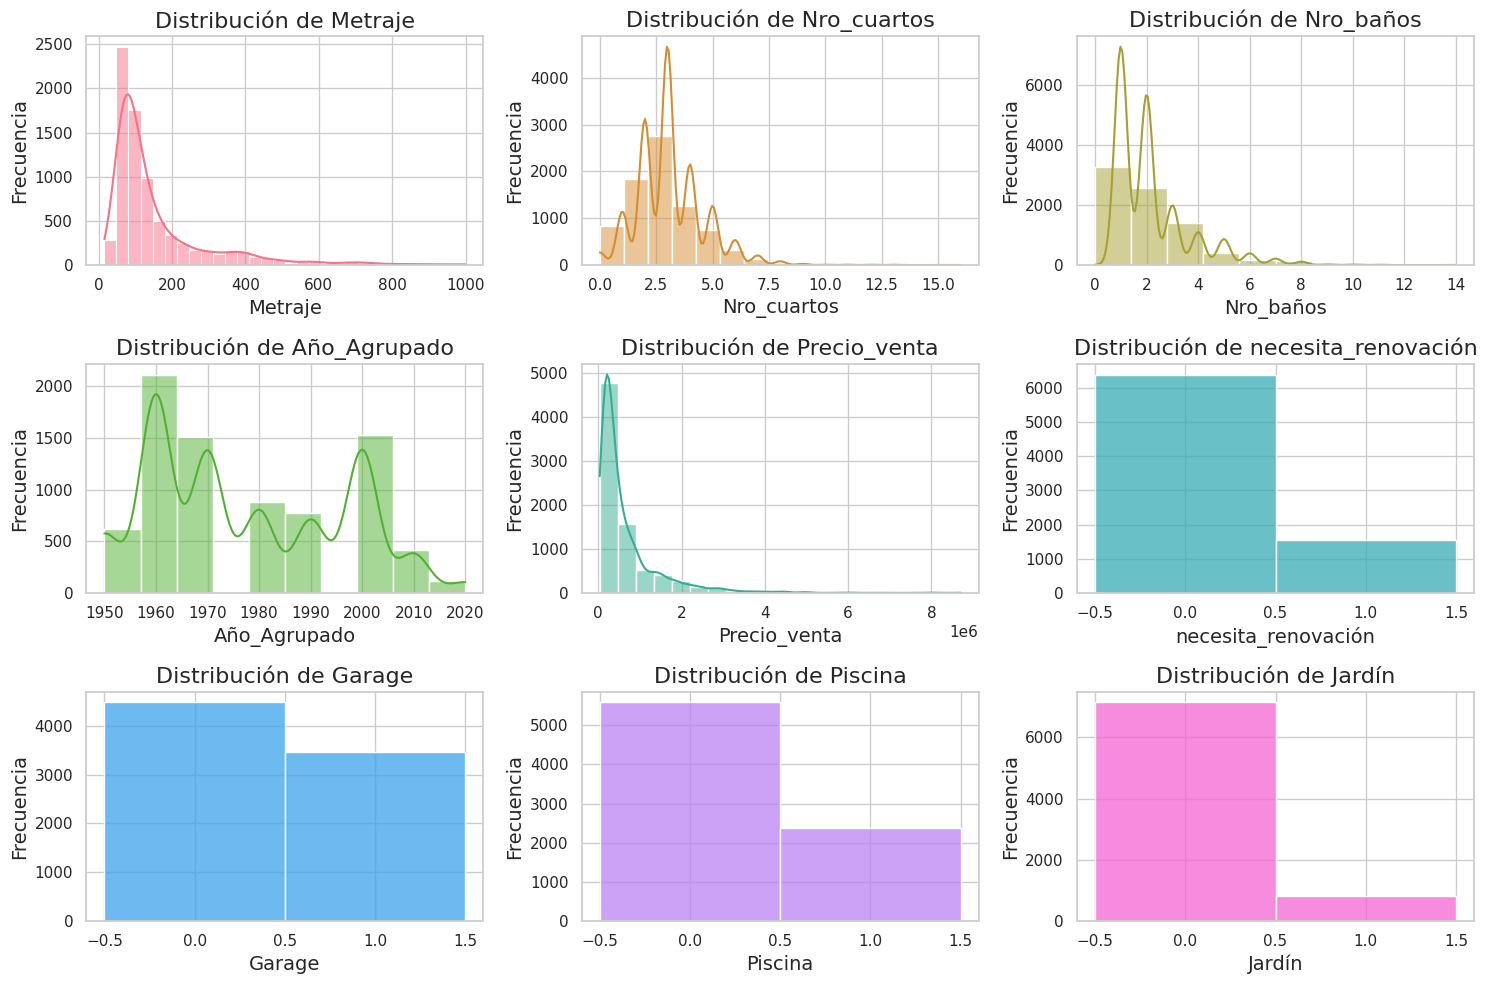

In [ ]:
metraje_data = Dset_Madrid["Metraje"]
cuartos_data = Dset_Madrid["Nro_cuartos"]
banos_data = Dset_Madrid["Nro_baños"]
ano_agrupado_data = Dset_Madrid["Año_Agrupado"]
precio_venta_data = Dset_Madrid["Precio_venta"]
renovacion_data = Dset_Madrid["necesita_renovación"]
garage_data = Dset_Madrid["Garage"]
piscina_data = Dset_Madrid["Piscina"]
jardin_data = Dset_Madrid["Jardín"]

# Configuración de la paleta de colores
palette = sns.color_palette("husl", 9)

# Configuración inicial
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Primer gráfico (Metraje)
plt.subplot(3, 3, 1)
sns.histplot(metraje_data, bins=30, kde=True, color=palette[0])
plt.xlabel('Metraje', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Metraje', fontsize=16)

# Segundo gráfico (Nro_cuartos)
plt.subplot(3, 3, 2)
sns.histplot(cuartos_data, bins=15, kde=True, color=palette[1])
plt.xlabel('Nro_cuartos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Nro_cuartos', fontsize=16)

# Tercer gráfico (Nro_baños)
plt.subplot(3, 3, 3)
sns.histplot(banos_data, bins=10, kde=True, color=palette[2])
plt.xlabel('Nro_baños', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Nro_baños', fontsize=16)

# Cuarto gráfico (Año_Agrupado)
plt.subplot(3, 3, 4)
sns.histplot(ano_agrupado_data, bins=10, kde=True, color=palette[3])
plt.xlabel('Año_Agrupado', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Año_Agrupado', fontsize=16)

# Quinto gráfico (Precio_venta)
plt.subplot(3, 3, 5)
sns.histplot(precio_venta_data, bins=20, kde=True, color=palette[4])
plt.xlabel('Precio_venta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Precio_venta', fontsize=16)

# Sexto gráfico (necesita_renovación)
plt.subplot(3, 3, 6)
sns.histplot(renovacion_data, bins=2, kde=False, color=palette[5], discrete=True)
plt.xlabel('necesita_renovación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de necesita_renovación', fontsize=16)

# Séptimo gráfico (Garage)
plt.subplot(3, 3, 7)
sns.histplot(garage_data, bins=2, kde=False, color=palette[6], discrete=True)
plt.xlabel('Garage', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Garage', fontsize=16)

# Octavo gráfico (Piscina)
plt.subplot(3, 3, 8)
sns.histplot(piscina_data, bins=2, kde=False, color=palette[7], discrete=True)
plt.xlabel('Piscina', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Piscina', fontsize=16)

# Noveno gráfico (Jardín)
plt.subplot(3, 3, 9)
sns.histplot(jardin_data, bins=2, kde=False, color=palette[8], discrete=True)
plt.xlabel('Jardín', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de Jardín', fontsize=16)

plt.tight_layout()
plt.show()

# 1- Hipótesis del impacto del barrio:
Se puede plantear la hipótesis de que el precio de las viviendas variará dependiendo del barrio en el que se encuentren. Barrios exclusivos o con una alta demanda podrían tener un impacto positivo en el precio, mientras que aquellos con menos demanda o menor atractivo podrían influir negativamente.



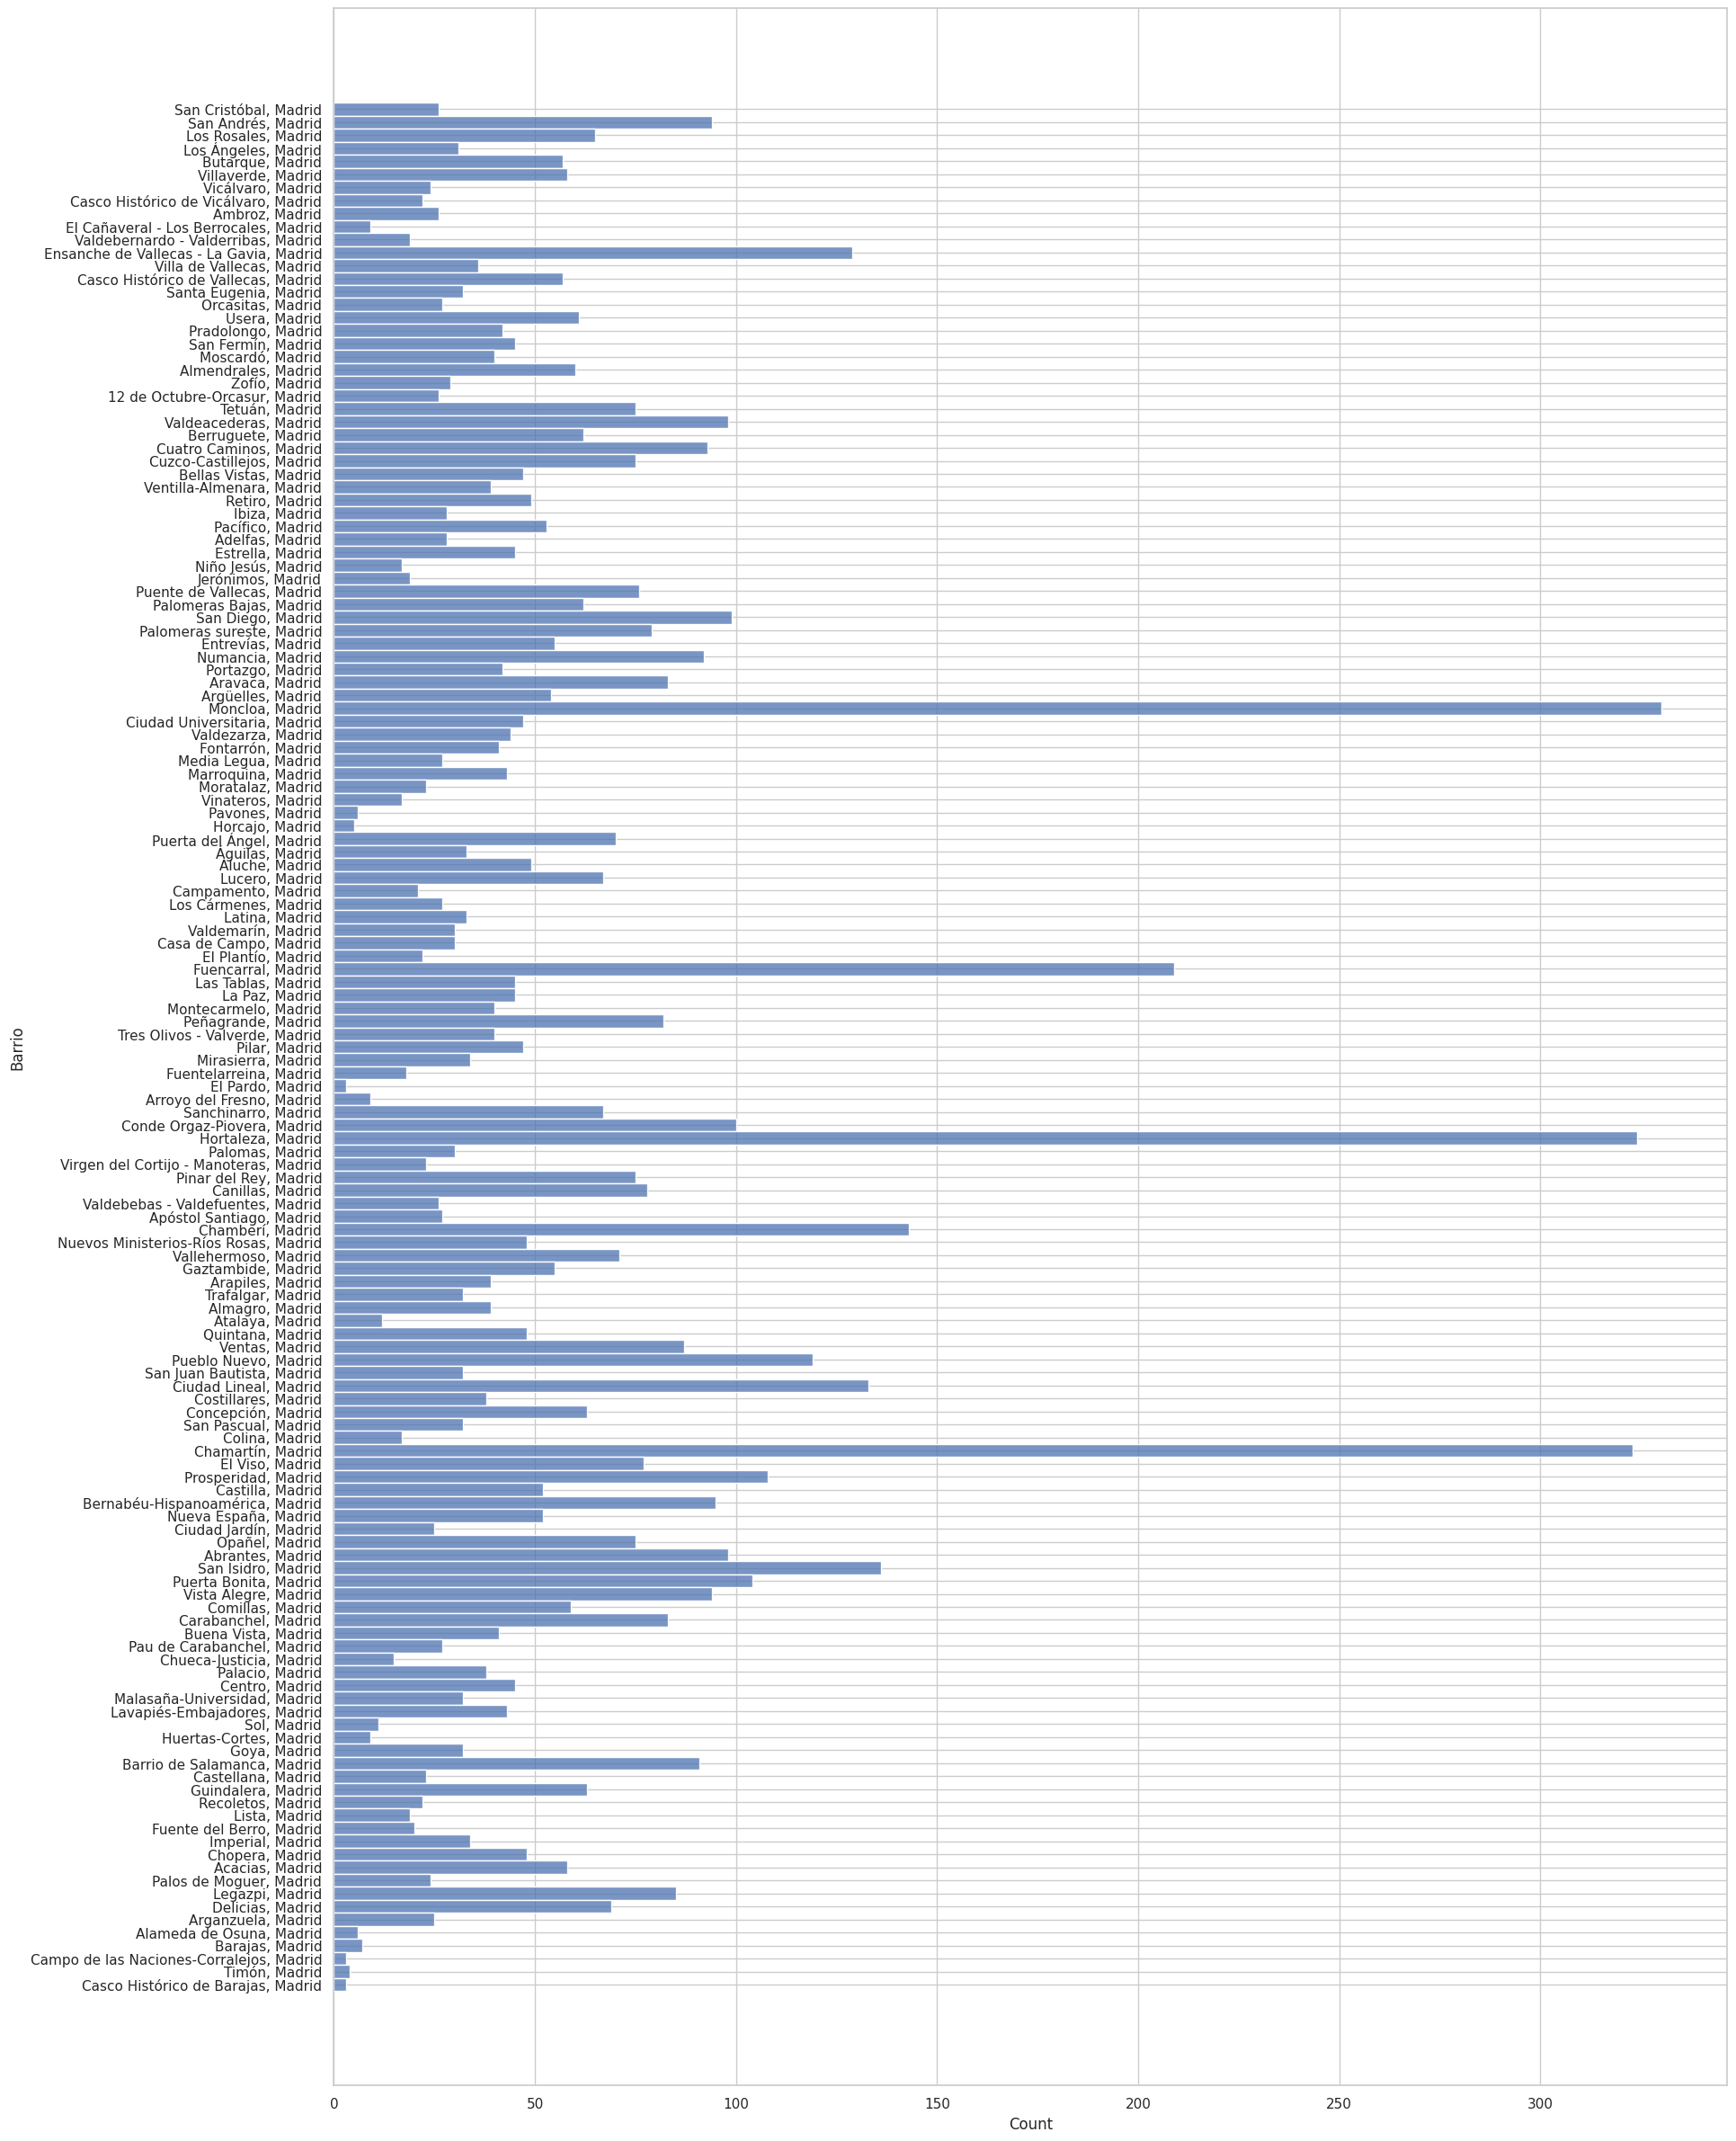

In [ ]:
fig, ax = plt.subplots(figsize=(20, 30))
ax=sns.histplot(data=Dset_Madrid, y="Barrio")

En el gráfico se observa la cantidad de viviendas en venta por barrio. Podemos pensar que en barrios con menor cantidad de viviendas a la venta, significa un mayor costo de venta, dado la ley de oferta y demanda.
Aunque pensándolo desde otra perspectiva, también se podría pensar que en un barrio donde hay mucha oferta de venta, podría corresponder a dos factores:
Que haya mucha construcción y por lo tanto mucha oferta dado el crecimiento exponencial del barrio, o se puede pensar que es un barrio en donde es muy difícil vender debido al contexto en donde se encuentra, y por lo tanto la oferta es mayor dado el estancamiento de las transacciones de venta.
En esta situación sería muy interesante agregar la variable Año de construcción, para poder afinar más la casuística.

# 2- Hipótesis del metraje de vivienda:
Se podría hipotetizar que el precio de la vivienda aumenta a medida que aumenta el metraje de la misma. Esto se basa en la suposición de que una mayor área construida se considera un factor de lujo y comodidad.



<Axes: xlabel='Metraje', ylabel='Precio_venta'>

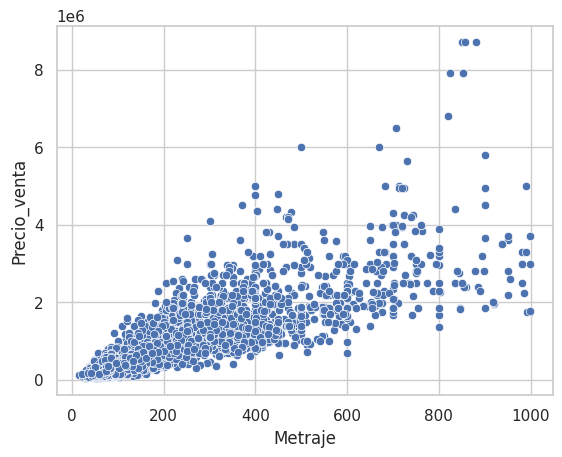

In [ ]:
sns.scatterplot(x="Metraje",y="Precio_venta",data=Dset_Madrid)

Se observa en el gráfico una pendiente positiva; a mayor cantidad de metros construidos, el precio de venta aumenta.

# 3- Hipótesis del precio por metro cuadrado:
Es posible plantear la hipótesis de que el precio por metro cuadrado influirá directamente en el precio total de la vivienda. Un precio más alto por metro cuadrado podría aumentar el precio total, mientras que un precio más bajo podría disminuirlo.



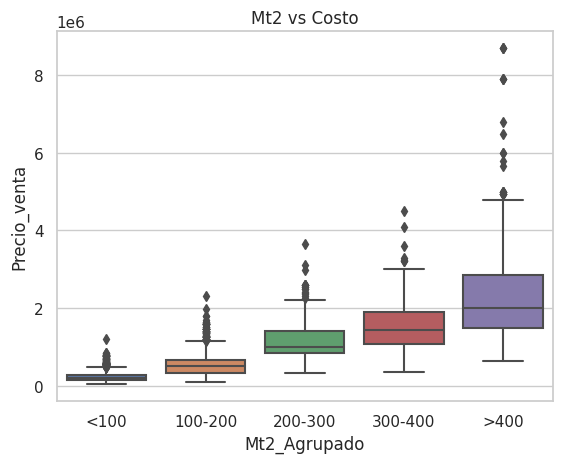

In [ ]:
sns.boxplot(x='Mt2_Agrupado', y = 'Precio_venta', data = Dset_Madrid)
plt.title("Mt2 vs Costo");

In [ ]:
#Elimino variable Mt2_Agrupado ya que finalizo análisis
Dset_Madrid=Dset_Madrid.drop(['Mt2_Agrupado'],axis=1)

# 4- Hipótesis del número de dormitorios y baños:
Se podría hipotetizar que el número de dormitorios y baños afecta el precio de la vivienda. Un mayor número de dormitorios y baños podría estar asociado con un mayor precio, ya que proporciona más espacio y comodidad.



<Axes: xlabel='Nro_baños', ylabel='Precio_venta'>

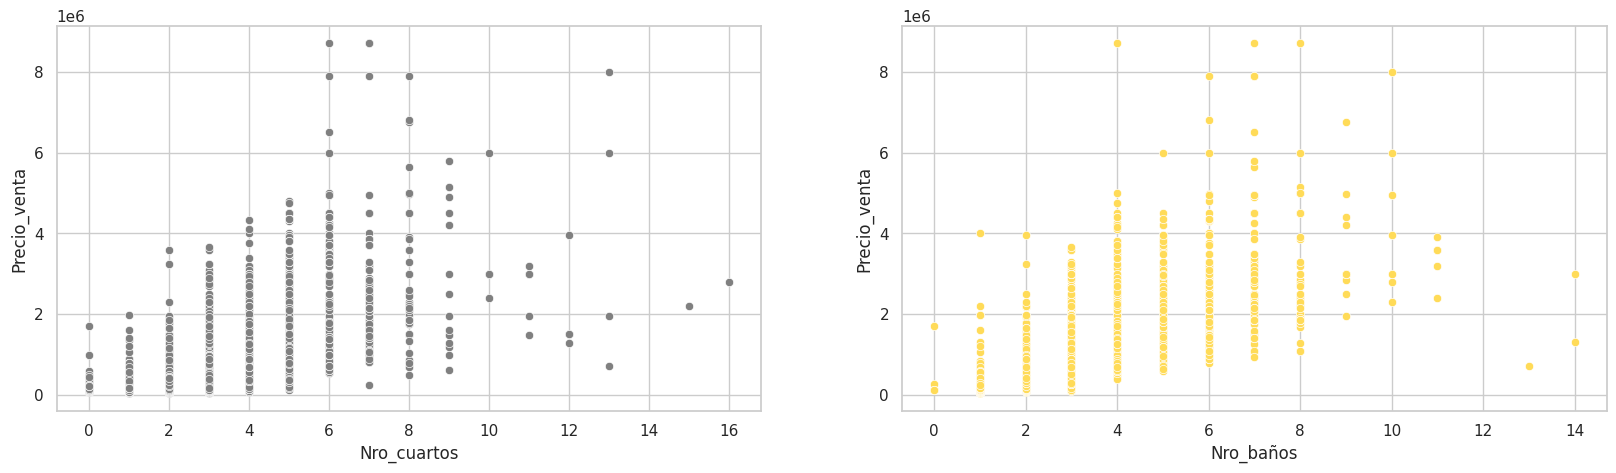

In [ ]:
f, axs = plt.subplots(1,2, figsize=(20, 5))
sns.scatterplot(x="Nro_cuartos",y="Precio_venta",data=Dset_Madrid,ax=axs[0],color='grey')
sns.scatterplot(x="Nro_baños",y="Precio_venta",data=Dset_Madrid,ax=axs[1],color='#FFDB58')

In [ ]:
Dset_Madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7958 entries, 0 to 7957
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Barrio               7958 non-null   object 
 1   Metraje              7904 non-null   float64
 2   Nro_cuartos          7958 non-null   int64  
 3   Nro_baños            7958 non-null   int64  
 4   Precio_venta         7958 non-null   int64  
 5   PrecioxM2            7958 non-null   int64  
 6   Tipología            7816 non-null   object 
 7   Año_Agrupado         7958 non-null   int64  
 8   Jardín               7958 non-null   int64  
 9   Piscina              7958 non-null   int64  
 10  Garage               7958 non-null   int64  
 11  Orientación          7958 non-null   object 
 12  is_floor_under       7699 non-null   float64
 13  necesita_renovación  7958 non-null   int64  
 14  has_lift             7958 non-null   int64  
 15  is_exterior          6689 non-null   f

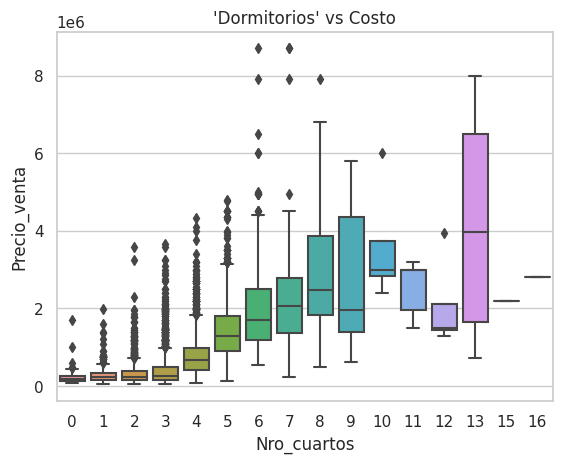

In [ ]:
sns.boxplot(x='Nro_cuartos', y = 'Precio_venta', data = Dset_Madrid)
plt.title("'Dormitorios' vs Costo");

# 5- Hipótesis de la cochera:
Se podría plantear la hipótesis de que la presencia de una cochera o estacionamiento en la vivienda podría aumentar el precio. La disponibilidad de estacionamiento es un factor importante para muchas personas al elegir una vivienda, especialmente en áreas urbanas.


<Axes: xlabel='Garage', ylabel='Count'>

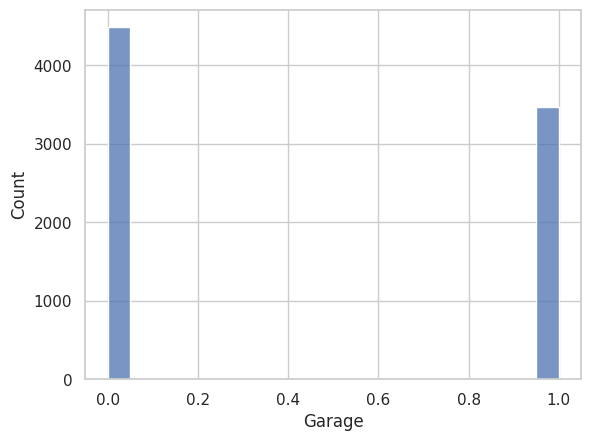

In [ ]:
sns.histplot(data=Dset_Madrid, x="Garage",bins=20)

# 7- Hipótesis de la orientación de la vivienda:
Se podría plantear la hipótesis de que la orientación de la vivienda (por ejemplo, sur, norte, este, oeste) podría afectar el precio. Algunas orientaciones pueden recibir más luz natural o tener mejores vistas, lo que podría influir en el precio.


<ipython-input-22-951f44ef484d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Grupo_orientación=Dset_Madrid.groupby(['Orientación']).mean()


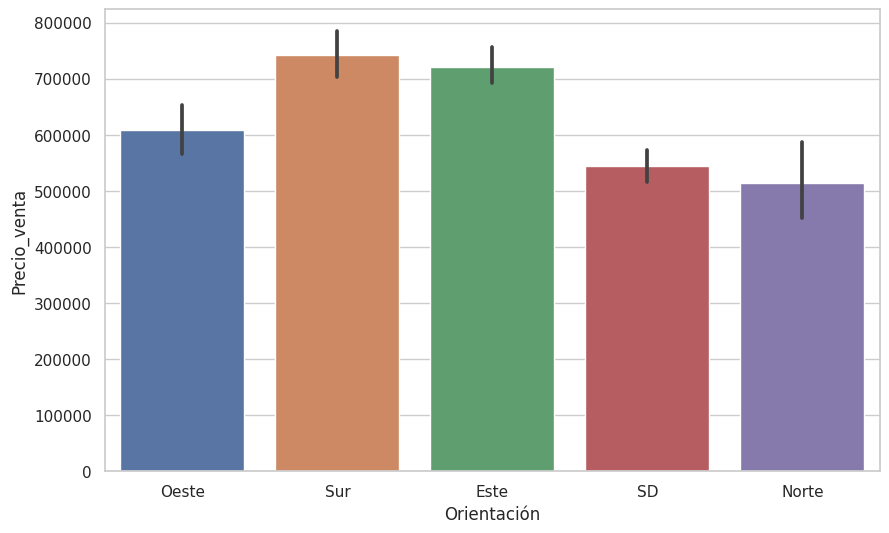

In [ ]:
Grupo_orientación=Dset_Madrid.groupby(['Orientación']).mean()
PromedioxOrientación=Grupo_orientación.Precio_venta

plt.figure(figsize=(10,6))
sns.barplot(y='Precio_venta',x='Orientación',data=Dset_Madrid);

Gráfico:Variaciones de precio sobre la base de la orientación.

# 8- Hipótesis de la antigüedad de la vivienda:
Cuanto más nueva es la vivienda, requerirá menor mantenimiento y por lo tanto el precio de venta será mayor, o influirá negativamente en caso contrario.

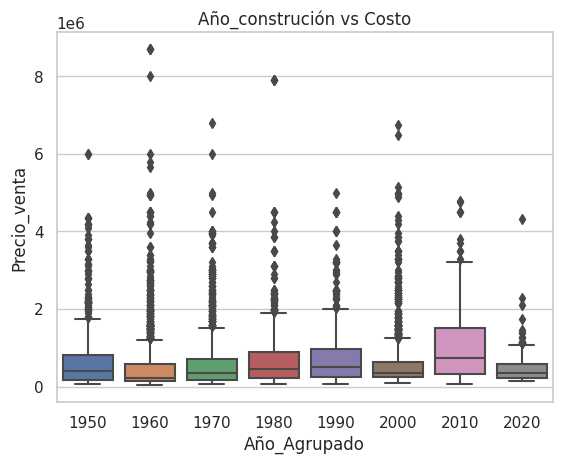

In [ ]:
sns.boxplot(x='Año_Agrupado', y = 'Precio_venta', data = Dset_Madrid)
plt.title("Año_construción vs Costo");

In [ ]:
# Codificación de Orientación para trabajar como variable numérica
Dset_Madrid['OrientaciónCod']=np.nan
Oeste=Dset_Madrid.Orientación=='Oeste'
Norte=Dset_Madrid.Orientación=='Norte'
Este=Dset_Madrid.Orientación=='Este'
Sur=Dset_Madrid.Orientación=='Sur'
SD=Dset_Madrid.Orientación=='SD'
O1='1'
O2='2'
O3='3'
O4='4'
OO='0'
Dset_Madrid.loc[Oeste,'OrientaciónCod'] = O1
Dset_Madrid.loc[Norte,'OrientaciónCod'] = O2
Dset_Madrid.loc[Este,'OrientaciónCod'] = O3
Dset_Madrid.loc[Sur,'OrientaciónCod'] = O4
Dset_Madrid.loc[SD,'OrientaciónCod'] = OO

# PRE-PROCESAMIENTO DE DATOS

#ANALISIS VALORES NULOS

In [ ]:
Dset_Madrid.isnull().sum()

Barrio                    0
Metraje                  54
Nro_cuartos               0
Nro_baños                 0
Precio_venta              0
PrecioxM2                 0
Tipología               142
Año_Agrupado              0
Jardín                    0
Piscina                   0
Garage                    0
Orientación               0
is_floor_under          259
necesita_renovación       0
has_lift                  0
is_exterior            1269
terraza                   0
balcón                    0
zonas_verdes              0
vestidor                  0
armarios_equipados        0
Piso                   1002
OrientaciónCod            0
dtype: int64

Existen valores nulos en algunas variables.

In [ ]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
Porcentaje_nulos=(Dset_Madrid.isnull().sum()/Dset_Madrid.shape[0])*100
Porcentaje_nulos=Porcentaje_nulos.sort_values(ascending=False)
Porcentaje_nulos= Porcentaje_nulos[Porcentaje_nulos>0]
Porcentaje_nulos

is_exterior       15.946218
Piso              12.591103
is_floor_under     3.254587
Tipología          1.784368
Metraje            0.678562
dtype: float64

In [ ]:
import missingno as msno

<Axes: >

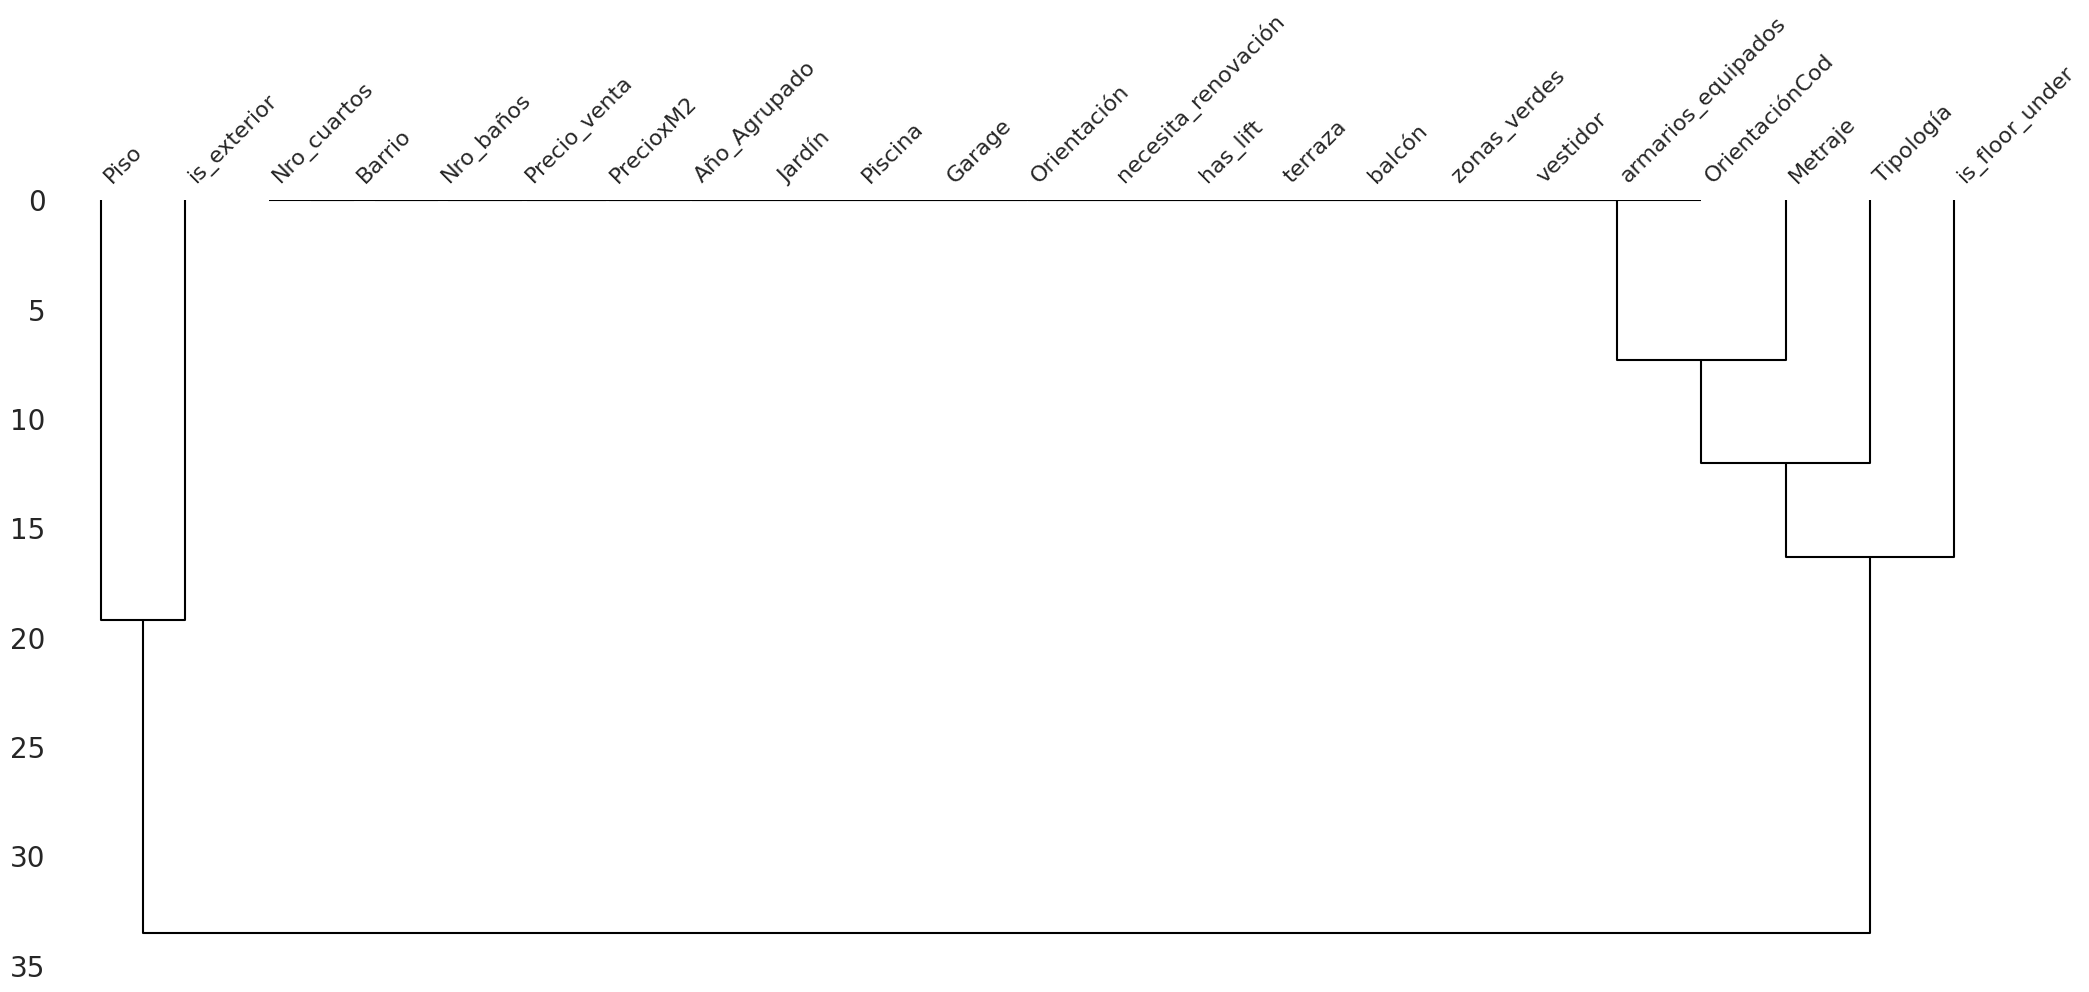

In [ ]:
msno.dendrogram(Dset_Madrid)

In [ ]:
# Las variables con nulos restantes, decido reemplazar los nulos por la moda.
moda_Metraje = Dset_Madrid['Metraje'].mode()[0]
moda_Tipología =Dset_Madrid['Tipología'].mode()[0]
moda_is_exterior  = Dset_Madrid['is_exterior'].mode()[0]
moda_Piso  = Dset_Madrid['Piso'].mode()[0]
moda_is_floor_under  = Dset_Madrid['is_floor_under'].mode()[0]






In [ ]:
print(moda_Metraje)
print(moda_Tipología)
print(moda_is_exterior)
print(moda_Piso)
print(moda_is_floor_under)

60.0
HouseType 1: Pisos
1.0
1
0.0


In [ ]:
# Reemplazo los valores nulos por la moda en cada columna
Dset_Madrid['Metraje']=Dset_Madrid['Metraje'].fillna(moda_Metraje)
Dset_Madrid['Tipología']=Dset_Madrid['Tipología'].fillna(moda_Tipología)
Dset_Madrid['is_exterior']=Dset_Madrid['is_exterior'].fillna(moda_is_exterior)
Dset_Madrid['Piso']=Dset_Madrid['Piso'].fillna(moda_Piso)
Dset_Madrid['is_floor_under']=Dset_Madrid['is_floor_under'].fillna(moda_is_floor_under)

In [ ]:
#verificación final sin nulos
Dset_Madrid.isnull().sum()

Barrio                 0
Metraje                0
Nro_cuartos            0
Nro_baños              0
Precio_venta           0
PrecioxM2              0
Tipología              0
Año_Agrupado           0
Jardín                 0
Piscina                0
Garage                 0
Orientación            0
is_floor_under         0
necesita_renovación    0
has_lift               0
is_exterior            0
terraza                0
balcón                 0
zonas_verdes           0
vestidor               0
armarios_equipados     0
Piso                   0
OrientaciónCod         0
dtype: int64

# LIMPIEZA DE REGISTROS DUPLICADOS

In [ ]:
#Busco cantidad de filas con datos duplicados en el dataset
Dset_Madrid.duplicated().sum()


146

In [ ]:
#visualizo algunos registros duplicados
registros_duplicados=Dset_Madrid[Dset_Madrid.duplicated()]
registros_duplicados.head()

,Barrio,Metraje,Nro_cuartos,Nro_baños,Precio_venta,PrecioxM2,Tipología,Año_Agrupado,Jardín,Piscina,...,necesita_renovación,has_lift,is_exterior,terraza,balcón,zonas_verdes,vestidor,armarios_equipados,Piso,OrientaciónCod
120,"Villaverde, Madrid",86.0,3,1,129000,1500,HouseType 1: Pisos,1980,0,0,...,0,1,0.0,1,0,0,0,1,4,4
204,"Villaverde, Madrid",98.0,3,2,219000,2235,HouseType 1: Pisos,2000,0,0,...,0,1,1.0,1,0,0,1,1,4,0
253,"Los Rosales, Madrid",125.0,3,2,210000,1680,HouseType 1: Pisos,1990,0,0,...,0,1,1.0,0,0,0,1,1,1,0
296,"Los Rosales, Madrid",80.0,3,1,128000,1600,HouseType 1: Pisos,1960,0,0,...,1,0,1.0,1,0,0,0,0,1,1
500,"Ensanche de Vallecas - La Gavia, Madrid",70.0,1,1,210000,3000,HouseType 1: Pisos,2000,0,0,...,0,1,1.0,0,0,1,1,1,0,4


In [ ]:
#Elimino registros duplicados
Dset_Madrid=Dset_Madrid.drop_duplicates(keep=False)



In [ ]:
Dset_Madrid=Dset_Madrid.dropna(subset=Dset_Madrid.columns.difference(['index']), how='all')

In [ ]:
#Verifico duplicados en el Dataset de Entrenamiento
Dset_Madrid.duplicated().sum()

0

# ANÁLISIS DE VALORES ATÍPICOS

In [ ]:
Dset_Madrid['OrientaciónCod']=Dset_Madrid['OrientaciónCod'].astype('int64')
Dset_Madrid['Piso']=Dset_Madrid['Piso'].astype('int64')

In [ ]:
Dset_Madrid.dtypes

Barrio                  object
Metraje                float64
Nro_cuartos              int64
Nro_baños                int64
Precio_venta             int64
PrecioxM2                int64
Tipología               object
Año_Agrupado             int64
Jardín                   int64
Piscina                  int64
Garage                   int64
Orientación             object
is_floor_under         float64
necesita_renovación      int64
has_lift                 int64
is_exterior            float64
terraza                  int64
balcón                   int64
zonas_verdes             int64
vestidor                 int64
armarios_equipados       int64
Piso                     int64
OrientaciónCod           int64
dtype: object

**Cortar atípicos al rango de outliers**

In [ ]:
Dset_numericas=['Metraje','Nro_cuartos','Nro_baños','Precio_venta','Año_Agrupado','Jardín','Piscina','Garage','is_floor_under','PrecioxM2','necesita_renovación','has_lift','is_exterior','terraza','balcón','zonas_verdes','vestidor','armarios_equipados','Piso','OrientaciónCod']

In [ ]:
#Importo librería StandarScaler para hacer escalamiento de datos, de modo de poder visualizar mejor el gráfico de caja y bigote
from sklearn.preprocessing import StandardScaler

In [ ]:
# Llamo y ejecuto función de escalamiento
scaler = StandardScaler()
df_scaled = scaler.fit(Dset_Madrid[Dset_numericas])
Dset_Madrid_escalado=scaler.transform(Dset_Madrid[Dset_numericas])



<Axes: >

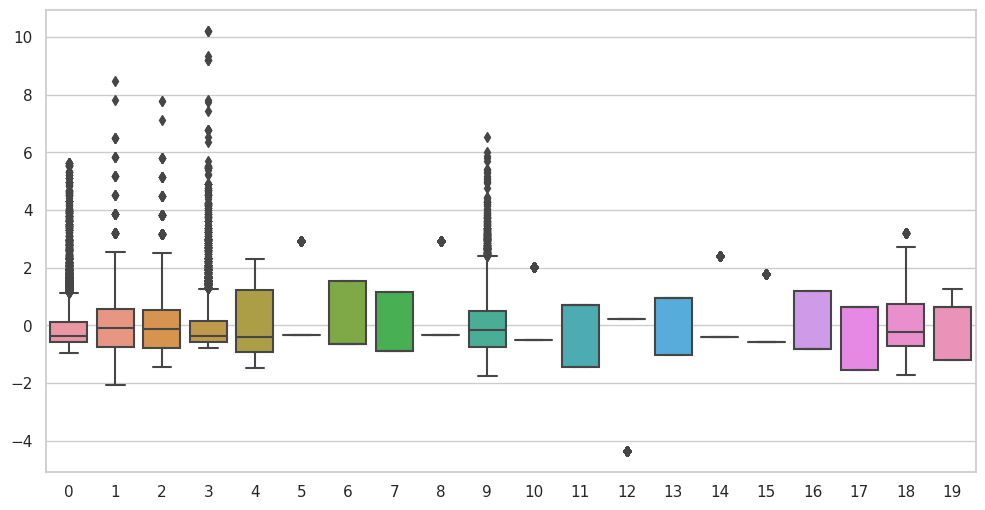

In [ ]:
# Gráfico de caja y bigote con datos atípicos
plt.figure(figsize=(12,6))
sns.boxplot(data=Dset_Madrid_escalado)



<Axes: >

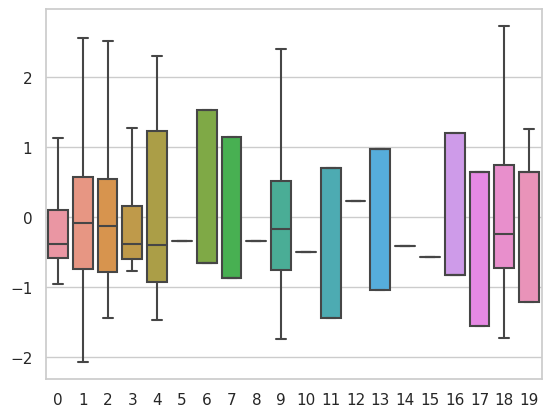

In [ ]:
Dset_Madrid
sns.boxplot(data=Dset_Madrid_escalado, showfliers=False)

In [ ]:
#identifico cantidad de registros con atípicos
#1901
Dset_Madrid.describe()

,Metraje,Nro_cuartos,Nro_baños,Precio_venta,PrecioxM2,Año_Agrupado,Jardín,Piscina,Garage,is_floor_under,necesita_renovación,has_lift,is_exterior,terraza,balcón,zonas_verdes,vestidor,armarios_equipados,Piso,OrientaciónCod
count,7676.000000,7676.000000,7676.000000,7.676000e+03,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000,7676.000000
mean,158.451407,3.136008,2.187728,6.491224e+05,3622.065920,1977.359302,0.104221,0.300026,0.434211,0.105003,0.197108,0.673788,0.949844,0.519020,0.149166,0.242314,0.411021,0.708963,2.486321,1.963132
std,149.145918,1.515437,1.517347,7.882947e+05,1674.577175,18.575922,0.305567,0.458299,0.495685,0.306577,0.397840,0.468856,0.218282,0.499671,0.356275,0.428511,0.492051,0.454270,2.024526,1.623226
min,16.000000,0.000000,0.000000,3.600000e+04,706.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,72.000000,2.000000,1.000000,1.800000e+05,2349.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,101.000000,3.000000,2.000000,3.500000e+05,3333.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
75%,174.000000,4.000000,3.000000,7.758200e+05,4468.750000,2000.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000,3.000000
max,999.000000,16.000000,14.000000,8.700000e+06,14542.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,4.000000


In [ ]:
#defino variables numéricas y transformo a tipo interger
numericas_eval_atipicos=['Metraje','Precio_venta','PrecioxM2']
Dset_Madrid[numericas_eval_atipicos]=Dset_Madrid[numericas_eval_atipicos].astype('int64')

In [ ]:
Dset_Madrid[numericas_eval_atipicos].describe()

,Metraje,Precio_venta,PrecioxM2
count,7676.000000,7.676000e+03,7676.000000
mean,158.451407,6.491224e+05,3622.065920
std,149.145918,7.882947e+05,1674.577175
min,16.000000,3.600000e+04,706.000000
25%,72.000000,1.800000e+05,2349.000000
50%,101.000000,3.500000e+05,3333.000000
75%,174.000000,7.758200e+05,4468.750000
max,999.000000,8.700000e+06,14542.000000


In [ ]:
for var in numericas_eval_atipicos:
    Q3 = Dset_Madrid[var].quantile(0.75)
    Q1 = Dset_Madrid[var].quantile(0.25)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    Dset_Madrid = Dset_Madrid[(Dset_Madrid[var] > lower) & (Dset_Madrid[var] < upper)]


In [ ]:
#Verificación sin atípicos
Dset_Madrid[numericas_eval_atipicos].describe()

,Metraje,Precio_venta,PrecioxM2
count,6247.000000,6.247000e+03,6247.000000
mean,105.104850,3.587101e+05,3286.380343
std,52.536629,2.464521e+05,1277.641515
min,16.000000,3.600000e+04,706.000000
25%,69.000000,1.617000e+05,2231.500000
50%,90.000000,2.750000e+05,3109.000000
75%,126.000000,4.900000e+05,4191.000000
max,326.000000,1.180000e+06,7200.000000


In [ ]:
#identifico cantidad de registros sin atípicos
#se eliminaron 987 registros
Dset_Madrid.describe()

,Metraje,Nro_cuartos,Nro_baños,Precio_venta,PrecioxM2,Año_Agrupado,Jardín,Piscina,Garage,is_floor_under,necesita_renovación,has_lift,is_exterior,terraza,balcón,zonas_verdes,vestidor,armarios_equipados,Piso,OrientaciónCod
count,6247.000000,6247.000000,6247.000000,6.247000e+03,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000,6247.00000,6247.000000,6247.000000,6247.000000
mean,105.104850,2.728670,1.655835,3.587101e+05,3286.380343,1976.372659,0.017288,0.229390,0.353130,0.124060,0.196414,0.721466,0.941092,0.482952,0.132544,0.263807,0.35329,0.687850,2.571634,1.902193
std,52.536629,1.097482,0.775469,2.464521e+05,1277.641515,18.323963,0.130354,0.420474,0.477981,0.329676,0.397317,0.448313,0.235472,0.499749,0.339108,0.440731,0.47803,0.463408,2.032071,1.619567
min,16.000000,0.000000,0.000000,3.600000e+04,706.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,0.000000
25%,69.000000,2.000000,1.000000,1.617000e+05,2231.500000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000
50%,90.000000,3.000000,2.000000,2.750000e+05,3109.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2.000000,3.000000
75%,126.000000,3.000000,2.000000,4.900000e+05,4191.000000,1990.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,4.000000,3.000000
max,326.000000,9.000000,6.000000,1.180000e+06,7200.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,9.000000,4.000000


#ANALISIS BIVARIADO

<ipython-input-51-ff76d62ddb1e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Dset_Madrid.corr(), cmap='jet')
<ipython-input-51-ff76d62ddb1e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Dset_Madrid.corr()


,Metraje,Nro_cuartos,Nro_baños,Precio_venta,PrecioxM2,Año_Agrupado,Jardín,Piscina,Garage,is_floor_under,necesita_renovación,has_lift,is_exterior,terraza,balcón,zonas_verdes,vestidor,armarios_equipados,Piso,OrientaciónCod
Metraje,1.000000,0.688036,0.814038,0.841142,0.198476,0.084864,0.359667,0.284678,0.405108,-0.147505,0.041789,0.201456,0.081205,0.210792,0.084925,0.218258,0.294861,0.230366,0.090904,0.114554
Nro_cuartos,0.688036,1.000000,0.596086,0.520552,-0.035471,-0.223937,0.216330,0.036712,0.151245,-0.175991,0.177313,0.024693,0.089305,0.241877,0.060942,0.056982,0.086006,0.080245,0.114929,0.070638
Nro_baños,0.814038,0.596086,1.000000,0.762881,0.295910,0.180626,0.304365,0.320234,0.414761,-0.131682,-0.001408,0.254279,0.058172,0.154239,0.058429,0.243679,0.299119,0.273051,0.087987,0.109850
Precio_venta,0.841142,0.520552,0.762881,1.000000,0.651513,0.102011,0.229435,0.328068,0.418480,-0.174320,0.026676,0.366861,0.024773,0.124229,0.070892,0.252092,0.297136,0.283249,0.131024,0.148330
PrecioxM2,0.198476,-0.035471,0.295910,0.651513,1.000000,0.159931,-0.005346,0.249751,0.267231,-0.145699,-0.049061,0.463917,-0.098391,-0.075651,0.031386,0.193659,0.170688,0.258609,0.126806,0.127466
Año_Agrupado,0.084864,-0.223937,0.180626,0.102011,0.159931,1.000000,0.062453,0.506567,0.492855,-0.009509,-0.326987,0.304588,0.086647,-0.039623,0.019413,0.373255,0.430909,0.286715,-0.010821,0.019010
Jardín,0.359667,0.216330,0.304365,0.229435,-0.005346,0.062453,1.000000,0.070764,0.120416,-0.049916,0.002434,-0.213468,0.033184,0.053678,0.038701,-0.079398,0.063834,0.031042,-0.102591,0.046687
Piscina,0.284678,0.036712,0.320234,0.328068,0.249751,0.506567,0.070764,1.000000,0.549636,-0.090986,-0.172944,0.275301,0.079907,-0.003101,-0.017893,0.642743,0.425138,0.246755,0.106777,0.068922
Garage,0.405108,0.151245,0.414761,0.418480,0.267231,0.492855,0.120416,0.549636,1.000000,-0.128704,-0.154521,0.315629,0.099505,0.033920,0.015418,0.478073,0.423674,0.297511,0.112578,0.108117
is_floor_under,-0.147505,-0.175991,-0.131682,-0.174320,-0.145699,-0.009509,-0.049916,-0.090986,-0.128704,1.000000,0.004619,-0.104140,-0.023400,-0.137298,-0.107008,-0.031349,-0.065830,-0.095453,-0.459335,-0.045638


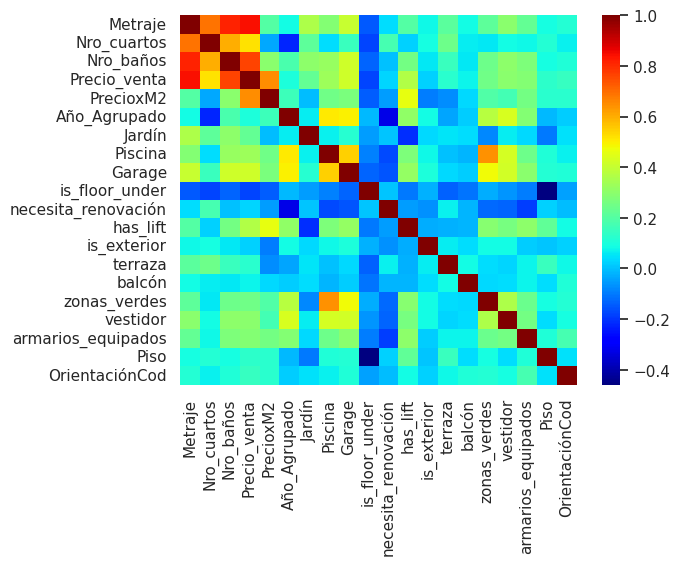

In [ ]:
#Correlación entre variables
sns.heatmap(Dset_Madrid.corr(), cmap='jet')
Dset_Madrid.corr()

***La variable objetivo Precio_venta, presenta una correlación fuerte con la variable predictora Metraje (0.81) y también correlación fuerte (0.6) con la variable PrecioxM2...Es lógico pensar que ambas variables predictoras se correlacionan, por lo cual defino eliminar la variable precioxM2***

In [ ]:
Dset_Madrid=Dset_Madrid.drop(['PrecioxM2'],axis=1)

<Axes: xlabel='Metraje', ylabel='Precio_venta'>

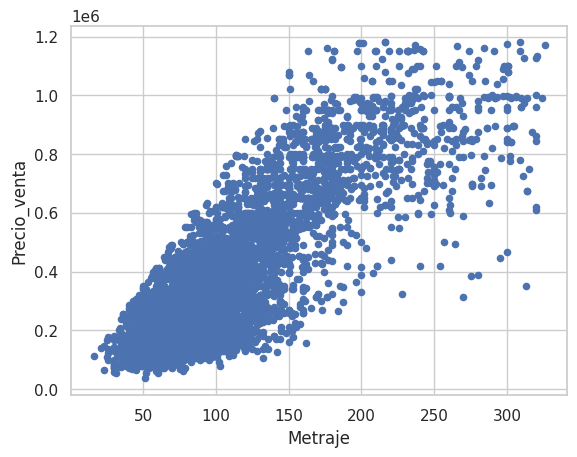

In [ ]:
#variable numérica vs numérica
Dset_Madrid.plot.scatter(x='Metraje', y='Precio_venta')

*Se puede observar una correlación fuerte entre las variables precio_venta y metraje. Son variables directamente proporcionales, ya que cuanto mayor es el valor del metraje, mayor es el valor del precio_venta*

<Axes: xlabel='Metraje', ylabel='Nro_baños'>

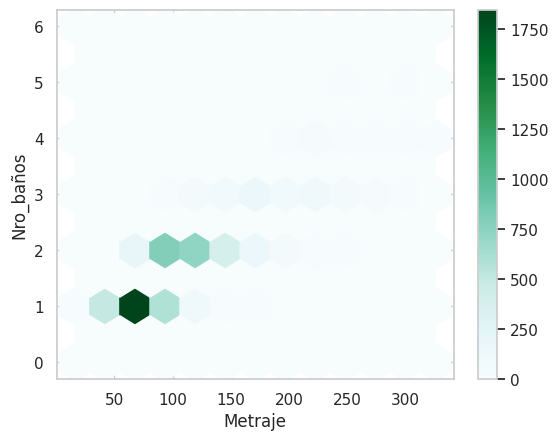

In [ ]:
#variable numérica vs numérica
Dset_Madrid.plot.hexbin(x='Metraje', y='Nro_baños', gridsize=12)

En esta otra gráfica, al analizar el metraje vs el número de baños, se presenta otra correlación fuerte, ya que para viviendas con menos de 75 mt2, presentan 1 solo baño, en cambio, las viviendas entre 100 y 150 mts2 presentan normalmente 2 baños. Luego, 3 o más baños se aprecia levemente para viviendas entre 150 y 200 mts2.

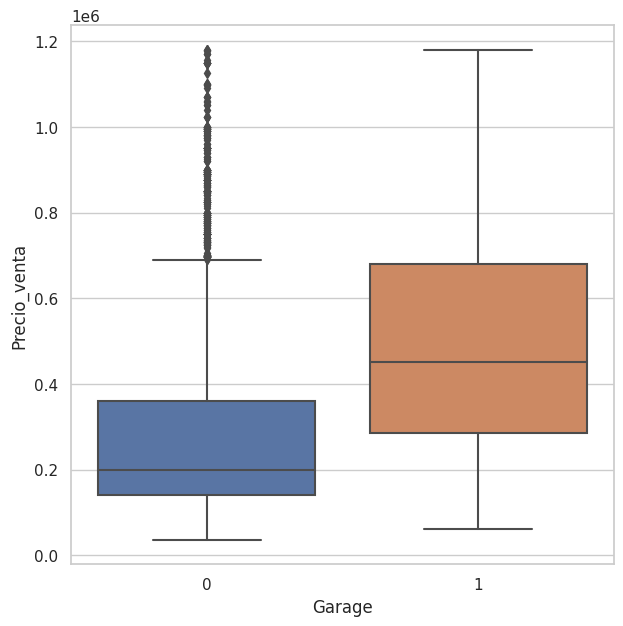

In [ ]:
##variable numérica vs categórica
#Boxplot
plt.figure(figsize=(7,7)) #defino el tamaño del grafico
sns.boxplot(y = 'Precio_venta', x = 'Garage', data = Dset_Madrid)
plt.show()

Al analizar la variable numérica Precio_venta vs variable categórica Garage(cuenta con él), podemos deducir que estas variables no tienen una correlación fuerte, ya que la mayor proporción de los datos de viviendas con garage se ubica entre los 300k y los 700k, con una media en los 400k, en cambio, las viviendas sin garage presentan los datos gruesos entre los 180k y los 390k, con una media en los 200k. Existe un desfasaje en el grueso de los datos de ambas variables, aunque en algunos casos se superponen las cajas.

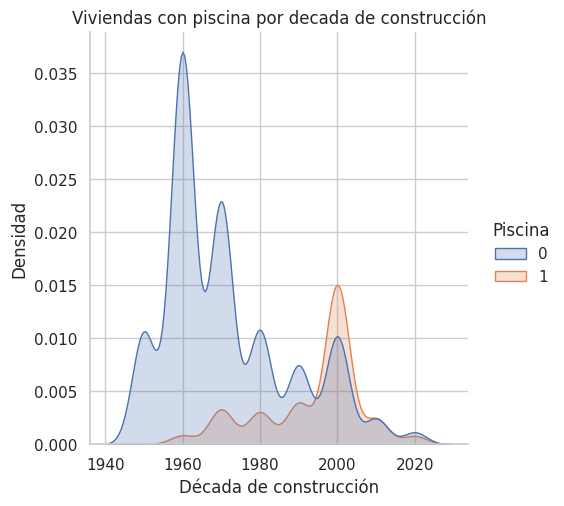

In [ ]:
##variable numérica vs categórica
#suprimo datos sin año de construcción
filtro = Dset_Madrid['Año_Agrupado'] > 0
graf1 = Dset_Madrid[filtro]
# Crear un gráfico de distribución
sns.set(style="whitegrid")
g = sns.displot(data=graf1, x='Año_Agrupado', hue='Piscina', kind='kde', fill=True)

# Establecer etiquetas y título
g.set(xlabel='Década de construcción', ylabel='Densidad', title='Viviendas con piscina por decada de construcción')

*Al analizar las variables década de construcción vs viviendas con piscina se puede observar que existe un desfasaje entre ambas variables desde 1940 hasta la década del 1990,  en donde a partir de aquí sí se correlacionan amabas variables. Por tal motivo, ambas variables tienen una correlación fuerte parcialmente, pero una correlación débil si evaluamos ambas variables a nivel general.*

<Figure size 1000x1000 with 0 Axes>

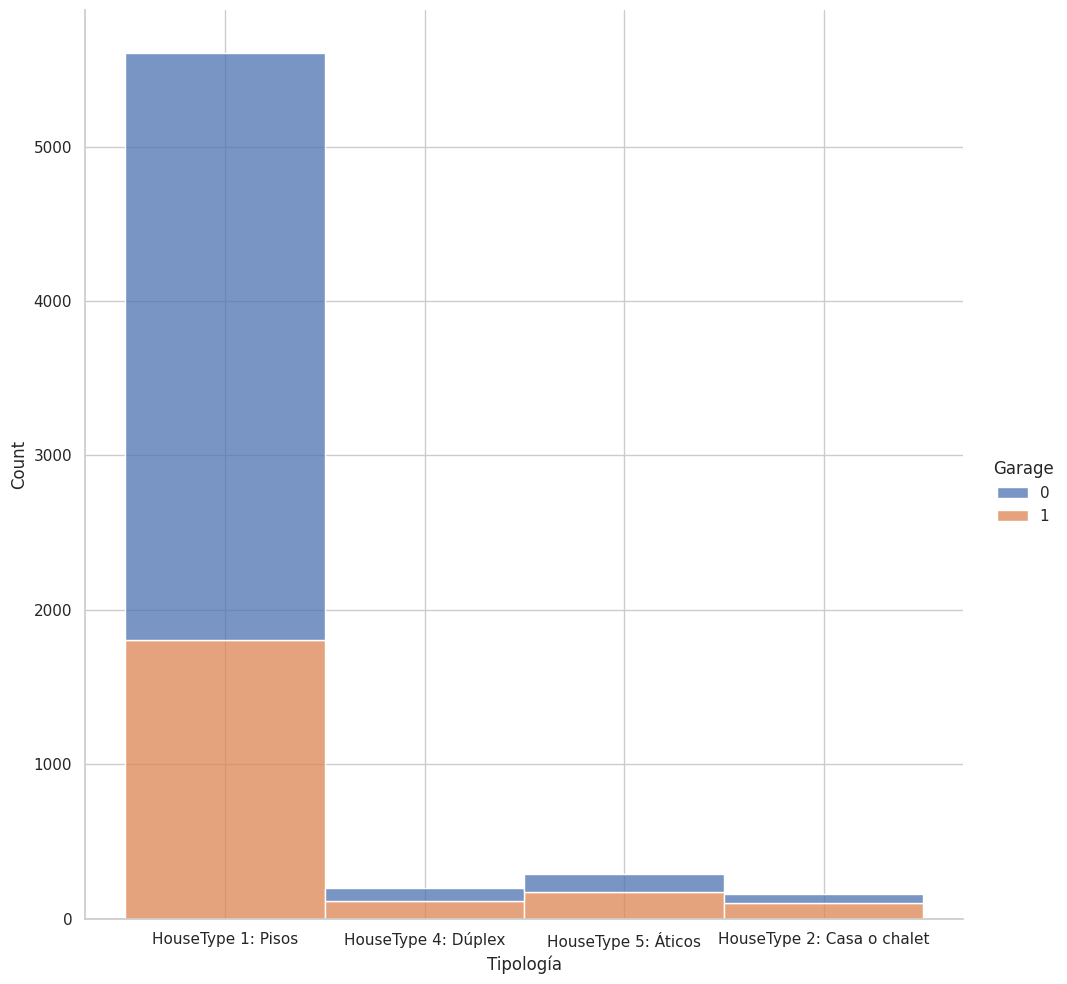

In [ ]:
# Variable categórica vs categórica
plt.figure(figsize=(10,10)) #defino el tamaño del grafico
sns.displot(data=Dset_Madrid, x="Tipología", hue="Garage", multiple="stack", height=10)

*Al observar el siguiente gráfico a nivel general, en donde analizamos la correlación entre 2 variables categóricas Tipología vs Garage, podemos interpretar que la proporción de viviendas con o sin garage se reparte casi uniformemente para todas las tipologías, por lo cual podemos afirmar que las viviendas que presentan la comodidad de garage no están relacionadas con una tipología específica.
Aunque, si miramos más en detalle, se ven pequeñas diferencias en las proporciones para la tipología pisos(monoambiente) en el cual predominan las viviendas sin garage, dado que presentan menores metrajes edificados, o por el contrario, la tipología casas o chalet, el cual significa mayor metraje construido, se aprecia una leve mayoría de viviendas construidas con garages.*

# ANALISIS MULTIVARIADO

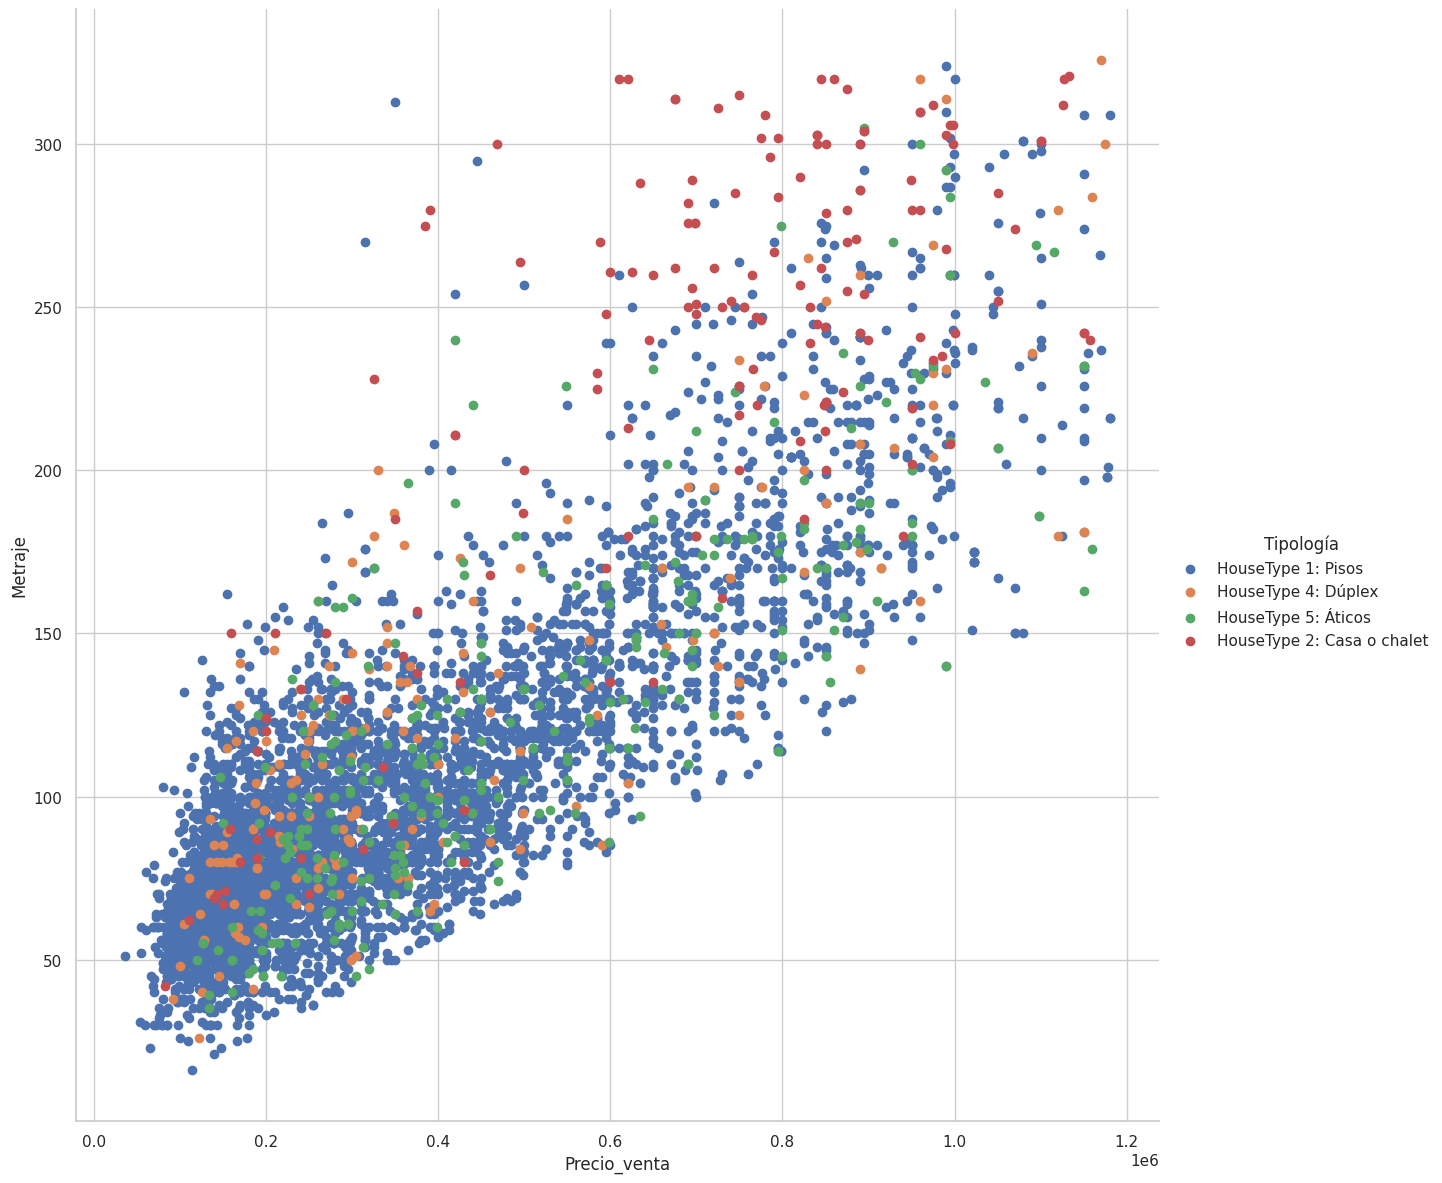

In [ ]:
# variable numérica vs numérica vs categórica
g = sns.FacetGrid(Dset_Madrid, hue='Tipología', height=12)
g.map(plt.scatter, 'Precio_venta', 'Metraje')
g.add_legend()
plt.show()

*Al analizar el gráfico relacionando Precio_venta vs Metraje y marca de color tipología se aprecia una gran mancha uniforme en la marca de color, por lo cual interpreto que no existe una correlación directa entre las variables.*

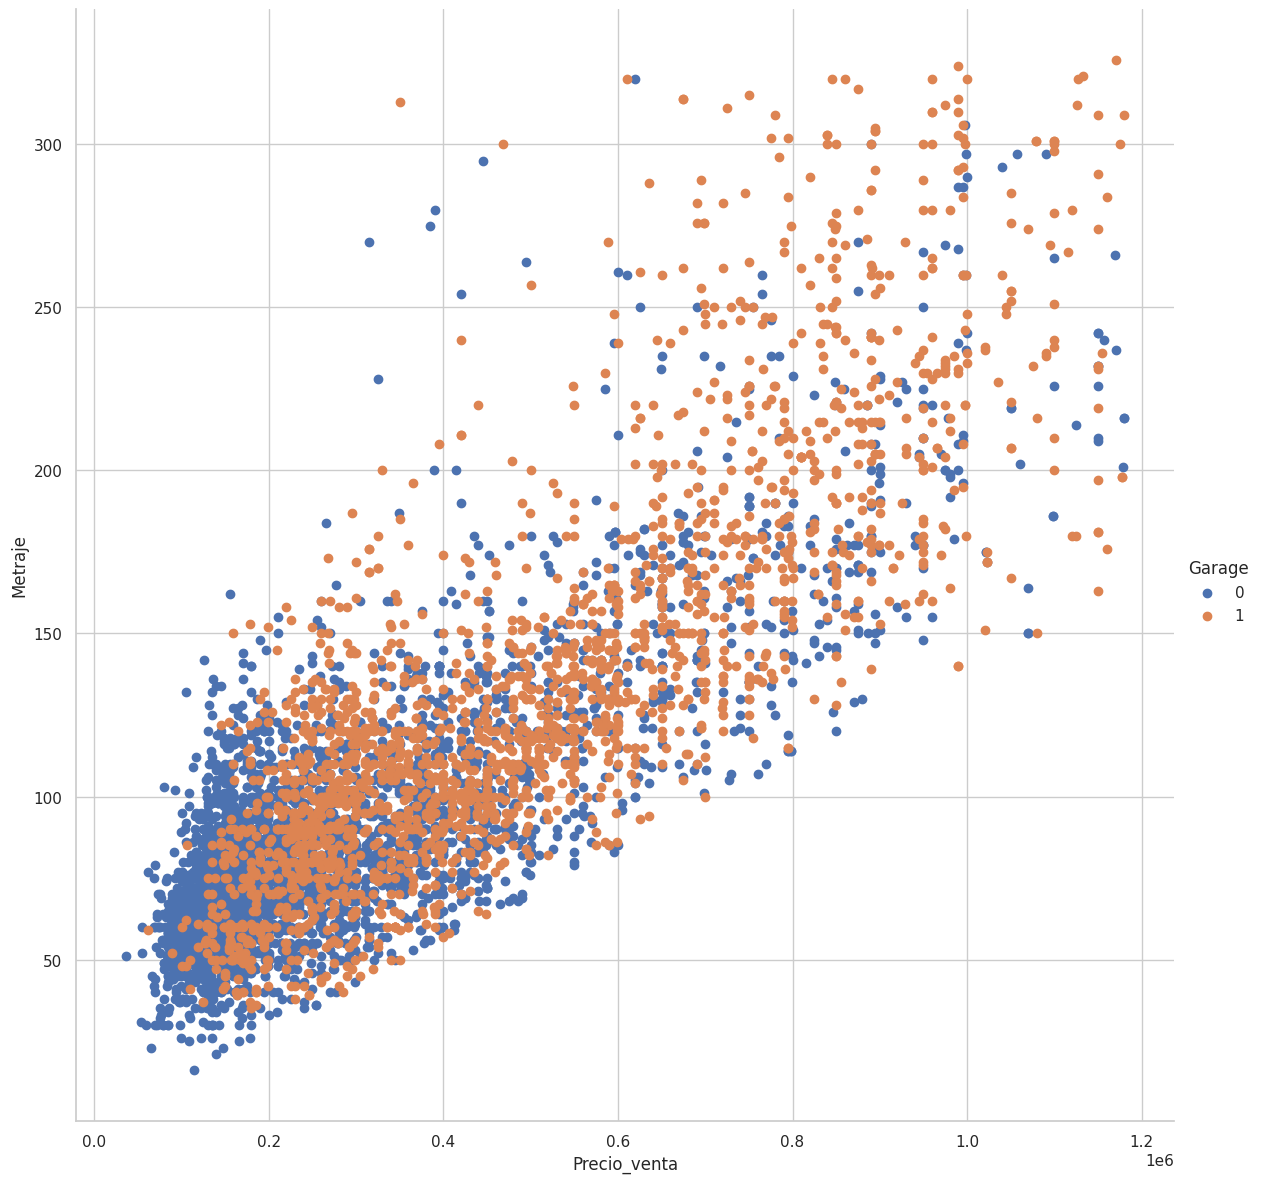

In [ ]:
# variable numérica vs numérica vs categórica
g = sns.FacetGrid(Dset_Madrid, hue='Garage', height=12)
g.map(plt.scatter, 'Precio_venta', 'Metraje')
g.add_legend()
plt.show()

En este otro análisis, si cambiamos la variable categórica "Tipología" por "Garage" podemos observar que existe un límite en 100 k en donde viviendas que cuestan menos de 100k y tienen menos de 100 mt2 no presentan garage, y en caso contrario, mayores a 100k y con mayor metraje que 100 mt2 se visualiza una mancha uniforme de viviendas con presencia de garage.

<ipython-input-60-eb4d69954a42>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Dset_Madrid, x="Metraje", y='Tipología', hue="Piscina", palette="viridis", ci=None)


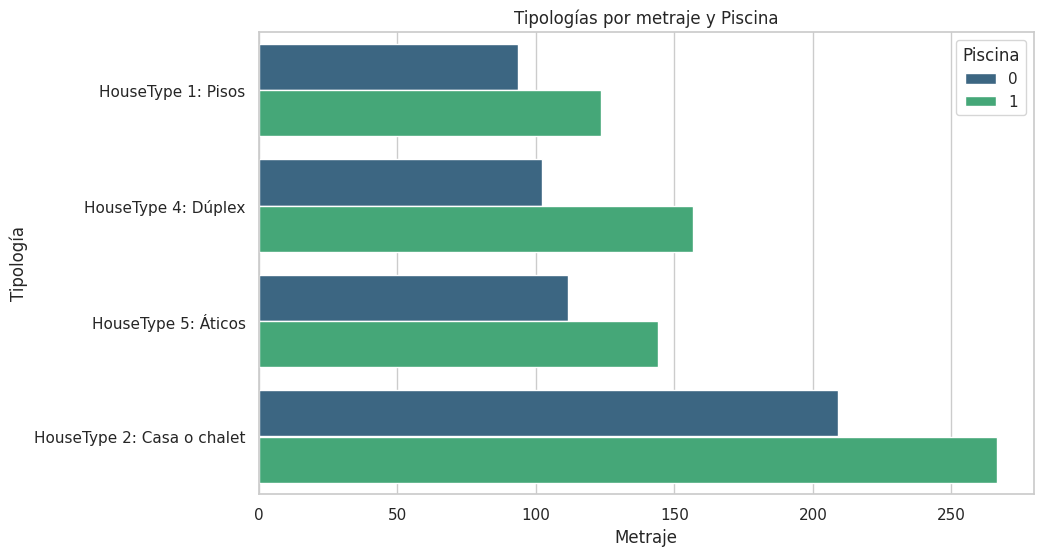

In [ ]:
# variable numérica vs categórica vs categórica

plt.figure(figsize=(10, 6))  # Define el tamaño del gráfico

sns.barplot(data=Dset_Madrid, x="Metraje", y='Tipología', hue="Piscina", palette="viridis", ci=None)

plt.xlabel("Metraje")
plt.ylabel("Tipología")
plt.title("Tipologías por metraje y Piscina")
plt.legend(title="Piscina", loc="upper right")

plt.show()





*Se puede interpretar en la gráfica que para las tipologías 1,3 y 4(monoambiente, dúpliex y áticos) las viviendas sin piscina tienen hasta 100mt2 construídos, en cambio, para la tipología 2 - casa o chalet, las viviendas sin piscina llegan hasta los 200mt2 construidos. Esto se puede explicar, ya que los lotes para las tipologías de casas son mayores.*

# **Análisis del Dataset pairplot con marca de color viviendas con o sin garage**

In [ ]:
# Define un diccionario de mapeo para las etiquetas personalizadas
label_mapping = {0: 'Sin garage', 1: 'Con garage'}

# Aplica el diccionario de mapeo a la columna 'Garage'
Dset_Madrid['Garagemap'] = Dset_Madrid['Garage'].map(label_mapping)

plt.figure(dpi=120)
pairplot = sns.pairplot(Dset_Madrid, hue='Garagemap', palette='plasma')
pairplot._legend.set_title('Garage')

# Utiliza plt.legend para personalizar las etiquetas
plt.legend(title='Garage', labels=['Sin garage', 'Con garage'])

plt.show()




Output hidden; open in https://colab.research.google.com to view.

# FEATURE ENGINEER

In [ ]:
#Formateo Dset Final
#Elimino variable categórica
Dset_Madrid=Dset_Madrid.drop(['Barrio','OrientaciónCod','Garagemap'],axis=1)

In [ ]:
# Codificación de variable categórica Tipología
Dset_Madrid = pd.get_dummies(Dset_Madrid, columns=['Tipología'], prefix=['T'])
# Codificación de variable categórica Orientación
Dset_Madrid = pd.get_dummies(Dset_Madrid, columns=['Orientación'], prefix=['O'])
#Formateo Tipo de datos
Dset_Madrid[['T_HouseType 1: Pisos','T_HouseType 2: Casa o chalet','T_HouseType 4: Dúplex','T_HouseType 5: Áticos','O_Este','O_Norte','O_Oeste','O_SD','O_Sur']]=Dset_Madrid[['T_HouseType 1: Pisos','T_HouseType 2: Casa o chalet','T_HouseType 4: Dúplex','T_HouseType 5: Áticos','O_Este','O_Norte','O_Oeste','O_SD','O_Sur']].astype('int64')
Dset_Madrid.head()

,Metraje,Nro_cuartos,Nro_baños,Precio_venta,Año_Agrupado,Jardín,Piscina,Garage,is_floor_under,necesita_renovación,...,Piso,T_HouseType 1: Pisos,T_HouseType 2: Casa o chalet,T_HouseType 4: Dúplex,T_HouseType 5: Áticos,O_Este,O_Norte,O_Oeste,O_SD,O_Sur
0,64,2,1,85000,1960,0,0,0,0.0,0,...,3,1,0,0,0,0,0,1,0,0
1,64,2,1,109900,1950,0,0,0,1.0,0,...,0,1,0,0,0,0,0,0,0,1
2,108,2,2,260000,2000,0,1,1,0.0,0,...,4,1,0,0,0,1,0,0,0,0
3,126,4,2,195000,1980,0,0,1,0.0,0,...,3,1,0,0,0,1,0,0,0,0
4,69,2,2,118000,1960,0,0,0,0.0,1,...,2,1,0,0,0,0,0,0,1,0



**FEATURE SELECTION**






In [ ]:
# instalo librería para selección de variables
!pip install mlxtend
# Importo librería mlxtend
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib


**SFS HACIA ATRAS**

In [ ]:
# Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
# Defino variable objetivo y variables predictoras
vobjetivo=Dset_Madrid['Precio_venta']
vpredictoras=Dset_Madrid.drop(['Precio_venta'],  axis=1)

In [ ]:
# Visualizo variables para verificar el correcto formato de datos
vpredictoras.head()

,Metraje,Nro_cuartos,Nro_baños,Año_Agrupado,Jardín,Piscina,Garage,is_floor_under,necesita_renovación,has_lift,...,Piso,T_HouseType 1: Pisos,T_HouseType 2: Casa o chalet,T_HouseType 4: Dúplex,T_HouseType 5: Áticos,O_Este,O_Norte,O_Oeste,O_SD,O_Sur
0,64,2,1,1960,0,0,0,0.0,0,0,...,3,1,0,0,0,0,0,1,0,0
1,64,2,1,1950,0,0,0,1.0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,108,2,2,2000,0,1,1,0.0,0,1,...,4,1,0,0,0,1,0,0,0,0
3,126,4,2,1980,0,0,1,0.0,0,0,...,3,1,0,0,0,1,0,0,0,0
4,69,2,2,1960,0,0,0,0.0,1,0,...,2,1,0,0,0,0,0,0,1,0


In [ ]:
# Formateo datos flotantes a interger
vpredictoras=vpredictoras.astype('int64')

In [ ]:
# Entrenamiento de selección de variables hacia adelante
sfs.fit(vpredictoras, vobjetivo)
# Resultado selección de variables hacia adelante
sfs.k_feature_names_

('Metraje',
 'Nro_cuartos',
 'Nro_baños',
 'Año_Agrupado',
 'Piscina',
 'is_floor_under',
 'has_lift',
 'terraza',
 'T_HouseType 2: Casa o chalet',
 'O_SD')

**SFS HACIA ADELANTE**

In [ ]:
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=15,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
# Entrenamiento de selección de variables hacia atras
sfs.fit(vpredictoras, vobjetivo)
# Resultado de selección de variables hacia atras
sfs.k_feature_names_

('Metraje',
 'Nro_cuartos',
 'Nro_baños',
 'Año_Agrupado',
 'Piscina',
 'Garage',
 'is_floor_under',
 'has_lift',
 'is_exterior',
 'terraza',
 'armarios_equipados',
 'T_HouseType 2: Casa o chalet',
 'T_HouseType 5: Áticos',
 'O_Oeste',
 'O_SD')

**ESCALAMIENTO CON ROBUSTSCALER PARA PROBAR ALGORITMO**

In [ ]:
# Defino variables predictoras y objetivo
X_RS=Dset_Madrid[['Metraje',
 'Nro_cuartos',
 'Nro_baños',
 'Año_Agrupado',
 'is_floor_under',
 'has_lift',
 'is_exterior',
 'terraza',
 'balcón',
 'zonas_verdes',
 'vestidor',
 'T_HouseType 1: Pisos',
 'T_HouseType 2: Casa o chalet',
 'T_HouseType 5: Áticos',
 'O_SD']]
y_RS=Dset_Madrid['Precio_venta']

In [ ]:
from sklearn.model_selection import train_test_split
#Divido datos de entrenamiento y prueba
X_train_RS, X_test_RS, y_train_RS, y_test_RS = train_test_split(X_RS, y_RS, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler

# Crear el objeto RobustScaler
scaler = RobustScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X_train_RS)

# Imprimir los datos originales y escalados
print("\nDatos escalados:\n", X_scaled)


Datos escalados:
 [[-0.48275862  0.         -1.         ...  0.          0.
   0.        ]
 [ 1.89655172  1.          0.         ...  0.          0.
   0.        ]
 [ 0.37931034 -2.         -1.         ...  0.          0.
   0.        ]
 ...
 [-0.56896552  0.         -1.         ...  0.          0.
   1.        ]
 [-0.13793103 -1.         -1.         ...  0.          0.
   0.        ]
 [ 0.01724138  0.         -1.         ...  0.          0.
   1.        ]]


In [ ]:

encabezado=['Metraje',
 'Nro_cuartos',
 'Nro_baños',
 'Año_Agrupado',
 'is_floor_under',
 'has_lift',
 'is_exterior',
 'terraza',
 'balcón',
 'zonas_verdes',
 'vestidor',
 'T_HouseType 1: Pisos',
 'T_HouseType 2: Casa o chalet',
 'T_HouseType 5: Áticos',
 'O_SD']

In [ ]:
df_escalado=df_escalado = pd.DataFrame(X_scaled, columns=encabezado)

# ENTRENAMIENTO DE MODELOS

*Entrenaré los modelos con las 15 variables generadas en SFS hacia adelante*

# APLICACION DE ALGORITMO 1- RANDOM FOREST REGRESSOR

In [ ]:
# Defino variables predictoras y objetivo
X_RF=Dset_Madrid[['Metraje',
 'Nro_cuartos',
 'Nro_baños',
 'Año_Agrupado',
 'is_floor_under',
 'has_lift',
 'is_exterior',
 'terraza',
 'balcón',
 'zonas_verdes',
 'vestidor',
 'T_HouseType 1: Pisos',
 'T_HouseType 2: Casa o chalet',
 'T_HouseType 5: Áticos',
 'O_SD']]
y_RF=Dset_Madrid['Precio_venta']

In [ ]:
# descargo el algoritmo bosque aleatorio para regresión y las métricas para evaluación de resultados
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
#Divido datos de entrenamiento y prueba
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.2, random_state=42)

In [ ]:
#Genero el modelo Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
#Entreno el modelo
rf_reg.fit(X_train_RF, y_train_RF)

RandomForestRegressor(random_state=42)

In [ ]:
#Hacer predicciones en el conjunto de prueba
y_pred_RF = rf_reg.predict(X_test_RF)

**Diferentes Métricas de evaluación del modelo**

In [ ]:
mse_RF = mean_squared_error(y_test_RF, y_pred_RF)
print("MSE:", mse_RF)
r2_RF = r2_score(y_test_RF,y_pred_RF)
print("r2:",r2_RF)
print("MAE",mean_absolute_error(y_test_RF,y_pred_RF))

MSE: 11428889589.062109
r2: 0.7972510664086472
MAE 77879.79685301933


# **Analisis gráfico**

<Axes: xlabel='Precio_venta'>

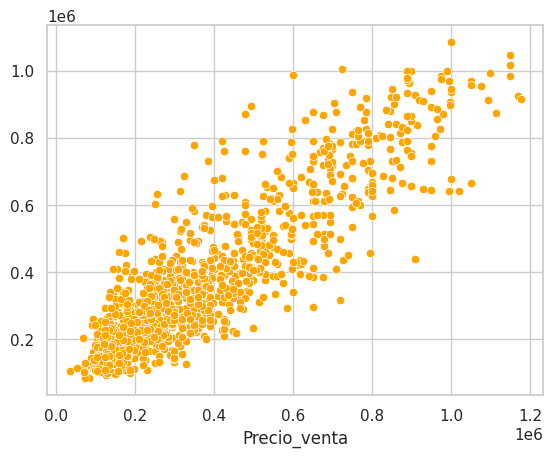

In [ ]:
sns.scatterplot(x=y_test_RF,y=y_pred_RF, color='orange')

# **Insights:**
El algoritmo elegido para comenzar con esta predicción fue el bosque aleatorio de regresión por el motivo de que funciona muy bien con datasets crudos (sin limpieza)
También podría haber sido el árbol de desisión, ya que tampoco tiene requisitos especiales de entrada, aunque tiene poco poder con la ventaja de una fácil interpretación.
Otra posibilidad hubiese sido usar la librería de auto maching learning TPOTclassifier en la cual se le pasa el dataset y sugiere los mejores algoritmos posibles para predecir la variable objetivo.

Dado el objetivo de predecir el precio de las viviendas, entiendo que el modelo inicial seleccionado (bosque aleatorio) no es muy preciso, ya que presenta un r2 de 0.83, por otro, lado el MAE da como resultado $63.000 de diferencia; tal vez es aceptable si consideramos viviendas exclusivas de más de 1 millón de dólares, pero no es un buen margen de error frente a viviendas que valen pocos cientos de miles de dólares.

# APLICACION DE ALGORITMO 2- XG-BOOST


In [ ]:
!pip install xgboost
from xgboost import XGBRegressor

In [ ]:
# Defino variables predictoras y objetivo
X_XG=Dset_Madrid[['Metraje',
 'Nro_cuartos',
 'Nro_baños',
 'Año_Agrupado',
 'is_floor_under',
 'has_lift',
 'is_exterior',
 'terraza',
 'balcón',
 'zonas_verdes',
 'vestidor',
 'T_HouseType 1: Pisos',
 'T_HouseType 2: Casa o chalet',
 'T_HouseType 5: Áticos',
 'O_SD']]
y_XG=Dset_Madrid['Precio_venta']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_XG, X_test_XG, y_train_XG, y_test_XG = train_test_split(X_XG, y_XG, test_size=0.2, random_state=42)

# Crear y entrenar el modelo XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train_XG, y_train_XG)

# Realizar predicciones en el conjunto de prueba
y_pred_XG = xgb_model.predict(X_test_XG)

# Evaluar el rendimiento del modelo
r2_XG = r2_score(y_test_XG, y_pred_XG)
mse_XG = mean_squared_error(y_test_XG, y_pred_XG)

print(f"R^2: {r2_XG}")
print(f"MSE: {mse_XG}")
print("MAE",mean_absolute_error(y_test_XG,y_pred_XG))





R^2: 0.7937976797657101
MSE: 11623555839.34197
MAE 77611.48008125


<Axes: xlabel='Precio_venta'>

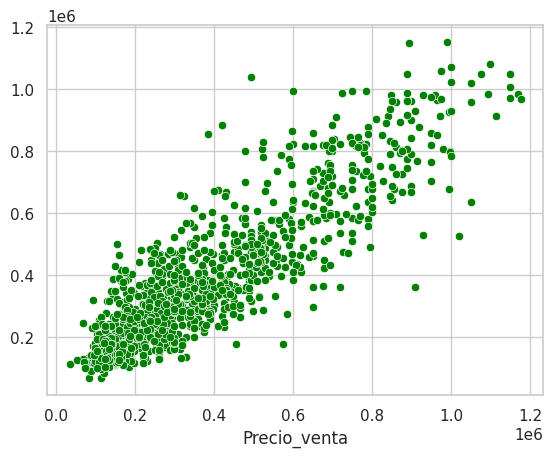

In [ ]:
#Analisis gráfico XG-BOOST
sns.scatterplot(x=y_test_XG,y=y_pred_XG, color='Green')

#ENTRENANDO ALGORITMO XG-BOOST CON PCA (PRINCIPAL COMPONENTS ANALYSIS)

In [ ]:
# genero nueva variable predictora para entrenar
X_PCA=X_RF
y_PCA=y_RF

In [ ]:
#Separamos en train y test
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=42)

In [ ]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_PCA = sc.fit_transform(X_train_PCA)
X_test_PCA = sc.transform(X_test_PCA)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X_train_PCA = pca.fit_transform(X_train_PCA)
X_test_PCA = pca.transform(X_test_PCA)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.21804588, 0.13180413, 0.10971192, 0.08190093, 0.07026607,
       0.06722877, 0.06211659, 0.05581705, 0.05158618])

**Evaluando modelo XG BOOST en base al PCA (9 componentes principales)**

In [ ]:
# Crear y entrenar el modelo XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train_PCA, y_train_PCA)

# Realizar predicciones en el conjunto de prueba
y_pred_PCA = xgb_model.predict(X_test_PCA)

# Evaluar el rendimiento del modelo
r2_PCA = r2_score(y_test_PCA, y_pred_PCA)
mse_PCA = mean_squared_error(y_test_PCA, y_pred_PCA)

print(f"R^2: {r2_PCA}")
print(f"MSE: {mse_PCA}")
print("MAE",mean_absolute_error(y_test_PCA,y_pred_PCA))



R^2: 0.7358158812748921
MSE: 14891970431.659563
MAE 88447.4409078125


<Axes: xlabel='Precio_venta'>

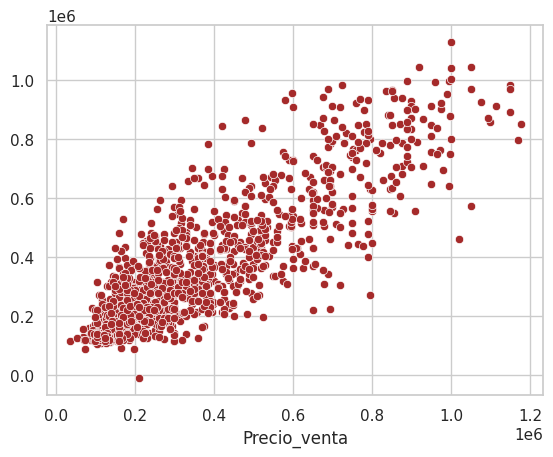

In [ ]:
#Análisis gráfico
sns.scatterplot(x=y_test_PCA,y=y_pred_PCA,color='brown')

*Insights:* El desempeño del modelo baja utilizando PCA, utilizando el modelo XG-BOOST.

#ENTRENANDO ALGORITMO XG-BOOST CON DATOS ESCALADOS CON ROBUSTSCALER

In [ ]:
# Crear y entrenar el modelo XGBoost
xgb_model.fit(X_train_RS, y_train_RS)

# Realizar predicciones en el conjunto de prueba
y_pred_RS = xgb_model.predict(X_test_RS)

# Evaluar el rendimiento del modelo
r2_RS = r2_score(y_test_RS, y_pred_RS)
mse_RS = mean_squared_error(y_test_RS, y_pred_RS)

print(f"R^2: {r2_RS}")
print(f"MSE: {mse_RS}")
print("MAE",mean_absolute_error(y_test_RS,y_pred_RS))

R^2: 0.7937976797657101
MSE: 11623555839.34197
MAE 77611.48008125


<Axes: xlabel='Precio_venta'>

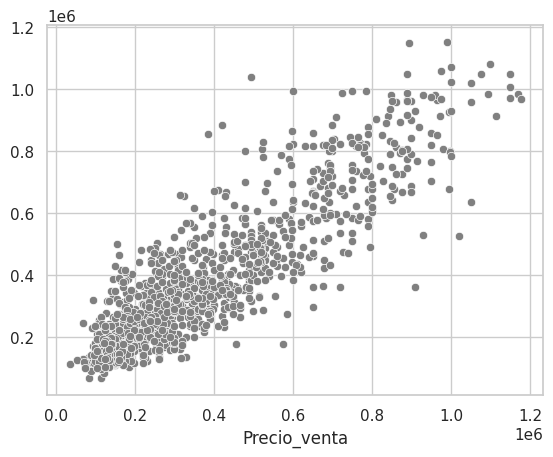

In [ ]:
#Análisis gráfico
sns.scatterplot(x=y_test_RS,y=y_pred_RS, color='grey')

# APLICACION DE ALGORITMO 3- RED NEURONAL

In [ ]:
# Defino variables predictoras y objetivo
X_RN=Dset_Madrid[['Metraje',
 'Nro_cuartos',
 'Nro_baños',
 'Año_Agrupado',
 'is_floor_under',
 'has_lift',
 'is_exterior',
 'terraza',
 'balcón',
 'zonas_verdes',
 'vestidor',
 'T_HouseType 1: Pisos',
 'T_HouseType 2: Casa o chalet',
 'T_HouseType 5: Áticos',
 'O_SD']]
y_RN=Dset_Madrid['Precio_venta']

In [ ]:
import tensorflow as tf
from tensorflow import keras


# Dividir los datos en conjunto de entrenamiento y prueba
X_train_RN, X_test_RN, y_train_RN, y_test_RN = train_test_split(X_RN, y_RN, test_size=0.2, random_state=42)

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_normalized = scaler.fit_transform(X_train_RN)

# Transformar los datos de prueba
X_test_normalized = scaler.transform(X_test_RN)




# Crear y compilar el modelo
model_RN = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_RN.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo con una función de pérdida para regresión (Mean Squared Error)
model_RN.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con los datos normalizados
model_RN.fit(X_train_normalized, y_train_RN, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

# Evaluar en el conjunto de prueba con datos normalizados
y_pred_RN = model_RN.predict(X_test_normalized)

# Calcular métricas (R^2, MSE, MAE) utilizando las métricas de scikit-learn
r2_RN = r2_score(y_test_RN, y_pred_RN)
mse_RN = mean_squared_error(y_test_RN, y_pred_RN)
mae_RN = mean_absolute_error(y_test_RN, y_pred_RN)

print(f'R^2: {r2_RN:.4f}')
print(f'MSE: {mse_RN:.4f}')
print(f'MAE: {mae_RN:.4f}')

Epoch 1/50
125/125 - 7s - loss: 191046795264.0000 - val_loss: 188948135936.0000 - 7s/epoch - 56ms/step
Epoch 2/50
125/125 - 1s - loss: 190950031360.0000 - val_loss: 188740894720.0000 - 885ms/epoch - 7ms/step
Epoch 3/50
125/125 - 1s - loss: 190540840960.0000 - val_loss: 188104310784.0000 - 683ms/epoch - 5ms/step
Epoch 4/50
125/125 - 1s - loss: 189560684544.0000 - val_loss: 186789560320.0000 - 941ms/epoch - 8ms/step
Epoch 5/50
125/125 - 1s - loss: 187774894080.0000 - val_loss: 184595726336.0000 - 871ms/epoch - 7ms/step
Epoch 6/50
125/125 - 1s - loss: 185022529536.0000 - val_loss: 181405597696.0000 - 1s/epoch - 9ms/step
Epoch 7/50
125/125 - 1s - loss: 181205172224.0000 - val_loss: 177144643584.0000 - 854ms/epoch - 7ms/step
Epoch 8/50
125/125 - 1s - loss: 176268378112.0000 - val_loss: 171823890432.0000 - 758ms/epoch - 6ms/step
Epoch 9/50
125/125 - 1s - loss: 170185900032.0000 - val_loss: 165338300416.0000 - 1s/epoch - 9ms/step
Epoch 10/50
125/125 - 1s - loss: 163041640448.0000 - val_loss: 

 *De los 3 modelos estudiados, pasare a configurar hiperparametros para los 2 primeros, ya que tuvierno mejor desempeño (RandomForestRegressor y XG-Boost)*

<Axes: >

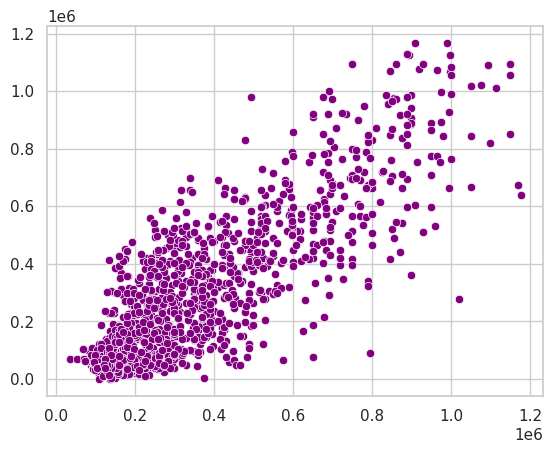

In [ ]:
#formateo resultados para grafico
y_test_RN = np.array(y_test_RN).flatten()
y_pred_RN = np.array(y_pred_RN).flatten()

sns.scatterplot(x=y_test_RN, y=y_pred_RN, color='purple')

#Análisis gráfico
sns.scatterplot(x=y_test_RN,y=y_pred_RN, color='purple')




# AJUSTE POR HIPERPARAMETROS MODELO RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

# Grid Search

In [ ]:
# Definir la malla de hiperparámetros
params_grid = {
    'n_estimators': [50, 100, 200],          # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'], # Número máximo de características a considerar en cada división
    'max_depth': [None, 10, 20, 30],           # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],           # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]
        }

In [ ]:
# Crear el objeto GridSearchCV y especificar scoring='r2'
grid_search = GridSearchCV(estimator=rf_reg, param_grid=params_grid,
                           scoring='r2', cv=5, n_jobs=-1)

# Realizar la búsqueda en la cuadrícula
grid_search.fit(X_train_RF, y_train_RF)

# Obtener el mejor modelo con los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_rf_model.predict(X_test_RF)

# Obtener el coeficiente de determinación R^2 en el conjunto de prueba
r2 = grid_search.score(X_test_RF, y_test_RF)

print(f"Mejor R^2 en el conjunto de prueba: {r2}")

Mejor R^2 en el conjunto de prueba: 0.8045962691857891


# Halving Randomized Search

In [ ]:

# Crear el objeto HalvingRandomSearchCV y especificar scoring='r2'
random_search = HalvingRandomSearchCV(estimator=rf_reg, param_distributions=params_grid,
                                      scoring='r2', cv=5, n_jobs=-1, factor=2, resource='n_samples',
                                      max_resources=300)

# Realizar la búsqueda aleatoria
random_search.fit(X_train_RF, y_train_RF)

# Obtener el mejor modelo con los mejores hiperparámetros
best_rf_model_random = random_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_random = best_rf_model_random.predict(X_test_RF)

# Obtener el coeficiente de determinación R^2 en el conjunto de prueba
r2_random = random_search.score(X_test_RF, y_test_RF)

print(f"Mejor R^2 en el conjunto de prueba (Randomized Search): {r2_random}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
  0.01414991 -0.05009497  0.38944026 -0.05789843  0.29444911  0.29165887
  0.6698906   0.29165887  0.45546035  0.59119568  0.60723341  0.36764144
 -0.10315893  0.02052198  0.37637906]
  warnings.warn(
/usr/local/lib

Mejor R^2 en el conjunto de prueba (Randomized Search): 0.798035657313305


# AJUSTE POR HIPERPARAMETROS MODELO XG BOOST

# Halving Grid Search

In [ ]:
# Crear un regresor XGBoost (reemplaza los parámetros con tus propios valores)
xg_reg = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=50)

# Definir la cuadrícula de hiperparámetros que deseas sintonizar
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Inicializar la búsqueda en cuadrícula con eliminación gradual para R cuadrado
halving_grid_search_r2 = HalvingGridSearchCV(
    xg_reg, param_grid, scoring=make_scorer(r2_score), cv=5, factor=3, resource='n_samples', verbose=1
)

# Realizar la búsqueda en cuadrícula para R cuadrado
halving_grid_search_r2.fit(X_train_XG, y_train_XG)

# Inicializar la búsqueda en cuadrícula con eliminación gradual para MSE
halving_grid_search_mse = HalvingGridSearchCV(
    xg_reg, param_grid, scoring=make_scorer(mean_squared_error), cv=5, factor=3, resource='n_samples', verbose=1
)

# Realizar la búsqueda en cuadrícula para MSE
halving_grid_search_mse.fit(X_train_XG, y_train_XG)

# Inicializar la búsqueda en cuadrícula con eliminación gradual para MAE
halving_grid_search_mae = HalvingGridSearchCV(
    xg_reg, param_grid, scoring=make_scorer(mean_absolute_error), cv=5, factor=3, resource='n_samples', verbose=1
)

# Realizar la búsqueda en cuadrícula para MAE
halving_grid_search_mae.fit(X_train_XG, y_train_XG)

# Mostrar los resultados para R cuadrado
print("Mejores hiperparámetros para R^2:", halving_grid_search_r2.best_params_)
print("Mejor R^2 de validación cruzada:", halving_grid_search_r2.best_score_)

# Mostrar los resultados para MSE
print("\nMejores hiperparámetros para MSE:", halving_grid_search_mse.best_params_)
print("Mejor MSE de validación cruzada:", halving_grid_search_mse.best_score_)

# Mostrar los resultados para MAE
print("\nMejores hiperparámetros para MAE:", halving_grid_search_mae.best_params_)
print("Mejor MAE de validación cruzada:", halving_grid_search_mae.best_score_)

# Evaluar en el conjunto de prueba para R cuadrado
y_pred_r2 = halving_grid_search_r2.best_estimator_.predict(X_test_XG)
r2_test = r2_score(y_test_XG, y_pred_r2)

# Evaluar en el conjunto de prueba para MSE
y_pred_mse = halving_grid_search_mse.best_estimator_.predict(X_test_XG)
mse_test = mean_squared_error(y_test_XG, y_pred_mse)

# Evaluar en el conjunto de prueba para MAE
y_pred_mae = halving_grid_search_mae.best_estimator_.predict(X_test_XG)
mae_test = mean_absolute_error(y_test_XG, y_pred_mae)

# Mostrar métricas en el conjunto de prueba
print("\nMétricas en el conjunto de prueba:")
print(f'R^2: {r2_test:.4f}')
print(f'MSE: {mse_test:.4f}')
print(f'MAE: {mae_test:.4f}')

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 185
max_resources_: 4997
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 185
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 555
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 1665
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 3
n_candidates: 1
n_resources: 4995
Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 185
max_resources_: 4997
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 27
n_resources: 185
Fitting 5 folds for each of 27 candidates, totalling 135 fits
----------
iter: 1
n_candidates: 9
n_resources: 555
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candid

#Evaluando modelo ML CROSSVALIDATION

**EVALUACIÓN ALGORITMO 1- RANDOM FOREST REGRESSOR**

In [ ]:
#Importo librerías CrossValidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [109]:
#Creo procedimiento
cv_RF=LeaveOneOut()
#Creo modelo
rf_reg_lvo = RandomForestRegressor(n_estimators=5, random_state=42)
# evaluo modelo
MAE= make_scorer(mean_absolute_error)
scores_RF = cross_val_score(rf_reg_lvo, X_RF, y_RF, cv=cv_RF, verbose=1,scoring=MAE,n_jobs=-1)
print("%0.2f de MAE promedio con una desviacion estandar de %0.2f" % (scores_RF.mean(), scores_RF.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 862 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1312 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1862 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3262 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4112 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 5062 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 6112 tasks      | elapsed:  9.1min


82694.97 de MAE promedio con una desviacion estandar de 83110.05


[Parallel(n_jobs=-1)]: Done 6247 out of 6247 | elapsed:  9.3min finished


**EVALUACIÓN ALGORITMO 2- XG BOOST**

In [108]:
#Creo procedimiento
cv_XG=LeaveOneOut()
#Creo modelo
xgb_model = XGBRegressor()
# evaluo modelo
MAE= make_scorer(mean_absolute_error)
scores_XG = cross_val_score(xgb_model, X_XG, y_XG, cv=cv_XG, verbose=1,scoring=MAE,n_jobs=-1)
print("%0.2f de MAE promedio con una desviacion estandar de %0.2f" % (scores_XG.mean(), scores_XG.std()))






[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 10.5min


77536.17 de MAE promedio con una desviacion estandar de 76623.81


[Parallel(n_jobs=-1)]: Done 6247 out of 6247 | elapsed: 10.9min finished


# CONCLUSIONES FINALES
**Luego de probar 3 algoritmos, los resultados son los siguientes:**

RANDOM FOREST REGRESSOR Variables originales:
MSE: 11428889589.062109 | r2: 0.7972510664086472 | MAE 77879.79685301933

XG BOOST Variables originales:
MSE: 11623555839.34197 | R^2: 0.7937976797657101 | MAE 77611.48008125

XG BOOST PCA ANALISIS:
MSE: 14891970431.659563 | R^2: 0.7358158812748921 | MAE 88447.4409078125

XG BOOST ROBUST SCALER : R^2:  0.7937976797657101

RED NEURONAL KERAS Variables originales:
MSE: 19111274057.1347 | R^2: 0.6610 | MAE: 105705.9517






**La variación en el desempeño de los algoritmos seleccionados son similares, acercándose al 79% de precisión.**

**Se tomaron los desempeños más altos para tunear hiperparámetros:**

RandomForest Variables originales:

Grid Serch | Mejor R^2: 0.8045962691857891

Halving Randomized Search | Mejor R^2: 0.8013300623268039

XG BOOST Variables originales:

Halving Grid Search | MSE: 53919115442.7307 | R^2: 0.7894 | MAE: 187247.7086




Él tuneo de hiperparámetros apenas logró subir 1% al desempeño del mejor algoritmo, siendo una mejora insignificante.

**De los dos modelos con mejor desempeño, se realiza la validación cruzada, obteniendo los siguientes valores:**

RANDOM FOREST REGRESSOR con LeaveOneOut:
82694.97 de MAE promedio con una desviacion estandar de 83110.05

XG BOOST con LeaveOneOut:
77536.17 de MAE promedio con una desviacion estandar de 76623.81


***Dada la información inicial, con el objetivo de desarrollar un algoritmo eficaz para predecir el precio de nuevos inmuebles en el mercado, podemos concluir que el rendimiento del algoritmo obtenido es de nivel medio a medio-alto, aunque no alcanza una precisión excelente. Este algoritmo podría funcionar como una herramienta de apoyo, permitiendo evitar la necesidad de realizar un porcentaje significativo de tasaciones, dejando el restante para ser evaluado por los agentes inmobiliarios.***